In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("city_day.csv")
print(Counter(data['City']))
data_delhi=data.loc[data['City']=='Delhi']
data_bangalore=data.loc[data['City']=='Bengaluru']


Counter({'Ahmedabad': 2009, 'Bengaluru': 2009, 'Chennai': 2009, 'Delhi': 2009, 'Lucknow': 2009, 'Mumbai': 2009, 'Hyderabad': 2006, 'Patna': 1858, 'Gurugram': 1679, 'Visakhapatnam': 1462, 'Amritsar': 1221, 'Jorapokhar': 1169, 'Jaipur': 1114, 'Thiruvananthapuram': 1112, 'Amaravati': 951, 'Brajrajnagar': 938, 'Talcher': 925, 'Kolkata': 814, 'Guwahati': 502, 'Coimbatore': 386, 'Shillong': 310, 'Chandigarh': 304, 'Bhopal': 289, 'Ernakulam': 162, 'Kochi': 162, 'Aizawl': 113})


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_delhi.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_delhi["Date"] = pd.to_datetime(data_delhi["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.set_index("Date", inplace=True)

In [ ]:
data_delhi

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  36.39  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  32.87  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  30.31  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  36.91  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  34.92  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-27   39.80  155.94  10.88  21.46  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  21.60  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  21.57  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  17.96  ...   0.84  10.51  37.29  114.0
2020-07-01   54.01  128.66   6.33  21.05  ...   0.97  11.15  29.73  101.0

[2009 rows x 10 columns]

In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2007 non-null   float64
 1   PM10    1932 non-null   float64
 2   NO      2007 non-null   float64
 3   NO2     2007 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2000 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     1899 non-null   float64
 8   O3      1925 non-null   float64
 9   AQI     1999 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


#Imputation of Missing Values

In [ ]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [ ]:
#Take data delhi PM2.5

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,0] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM2.5'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,0]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,0]-clone2.iloc[random_indices,-2]))/200

27.748499999999993


24.25125

In [ ]:
#Take data delhi PM10

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,1] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM10'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,1]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,1]-clone2.iloc[random_indices,-2]))/200

55.89505


53.635349999999995

In [ ]:
#Take data delhi NO

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,2] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,2]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,2]-clone2.iloc[random_indices,-2]))/200

16.22145


14.5303

In [ ]:
#Take data delhi NO2

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,3] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO2'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,3]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,3]-clone2.iloc[random_indices,-2]))/200

8.45015


8.36435

In [ ]:
#Take data delhi NH3

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,5] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NH3'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,5]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,5]-clone2.iloc[random_indices,-2]))/200

5.4197500000000005


5.26905

In [ ]:
#Take data delhi SO2

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,7] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,7]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,7]-clone2.iloc[random_indices,-2]))/200

2.5032


2.9508000000000005

In [ ]:
#Take data delhi O3

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,8] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['O3'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,8]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,8]-clone2.iloc[random_indices,-2]))/200

8.18735


9.138599999999999

In [ ]:
#Take data delhi AQI

# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices,9] = np.nan #Change 0 for all values

clone2 = clone.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()") #Only corresponds to PM2.5


#Mean Error bfill
print(np.sum(abs(data_delhi.iloc[random_indices,9]-clone2.iloc[random_indices,-1]))/200)
#Mean Error ffill
np.sum(abs(data_delhi.iloc[random_indices,9]-clone2.iloc[random_indices,-2]))/200

42.815


38.655

In [ ]:
clone

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  36.39  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  32.87  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  30.31  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  36.91  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  34.92  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-27   39.80  155.94  10.88  21.46  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  21.60  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  21.57  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  17.96  ...   0.84  10.51  37.29  114.0
2020-07-01   54.01  128.66   6.33  21.05  ...   0.97  11.15  29.73  101.0

[2009 rows x 10 columns]

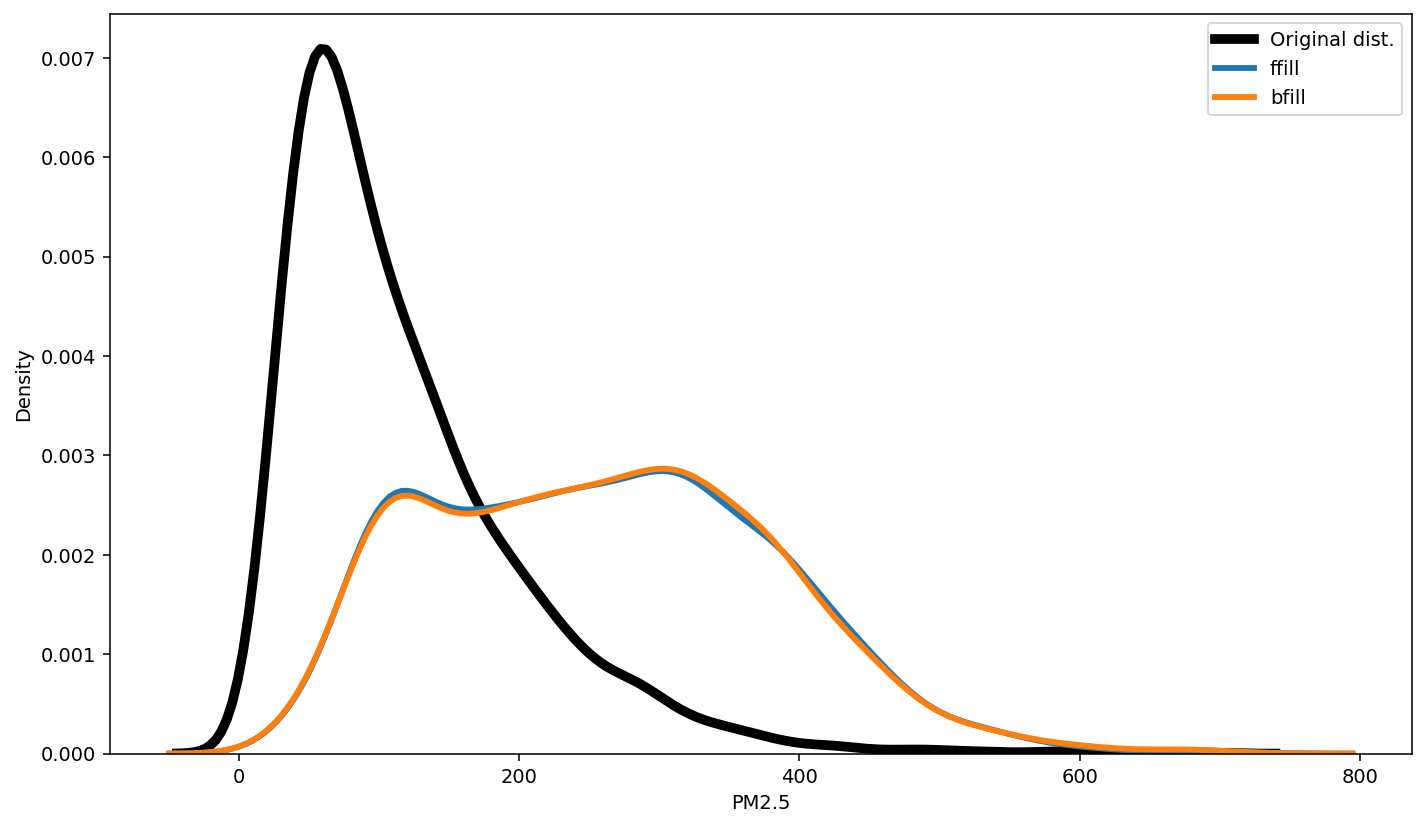

In [ ]:
compare_dists(data_delhi["PM2.5"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
#Assign



In [ ]:
data_delhi.iloc[random_indices,0]

Date
2017-10-29    187.82
2019-04-05    125.44
2015-02-26    140.78
2017-02-06    176.04
2017-07-30     10.88
               ...  
2017-12-13    134.99
2019-08-09     14.59
2017-07-17     33.56
2019-09-09     56.31
2015-10-04    145.97
Name: PM2.5, Length: 200, dtype: float64

In [ ]:
# data_delhi['diff_NO2']=data_delhi['NO2']-clone2['bfill']

In [ ]:
# data_delhi['diff_NO2_']=data_delhi['NO2']-clone2['ffill']

In [ ]:
# data_delhi["diff_NO2"].mean()

In [ ]:
# data_delhi["diff_NO2_"].mean()

In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2007 non-null   float64
 1   PM10    1932 non-null   float64
 2   NO      2007 non-null   float64
 3   NO2     2007 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2000 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     1899 non-null   float64
 8   O3      1925 non-null   float64
 9   AQI     1999 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_delhi['NO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


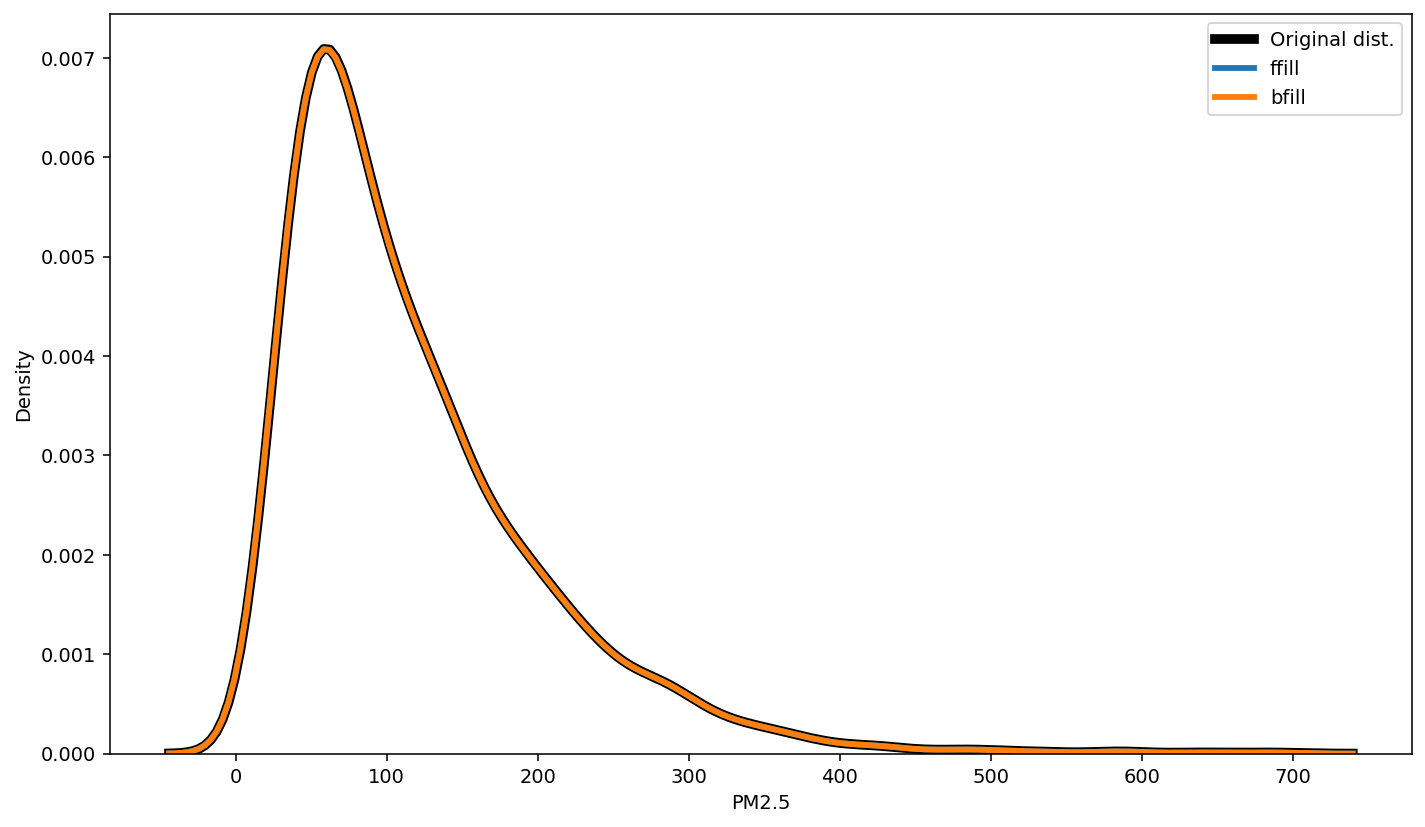

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM2.5'].{method}()")

compare_dists(data_delhi["PM2.5"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
# data_delhi['diff_PM2.5']=data_delhi['PM2.5']-clone['PM2.5']

In [ ]:
# data_delhi['diff_PM2.5'].mean()

In [ ]:
data_delhi['PM2.5']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


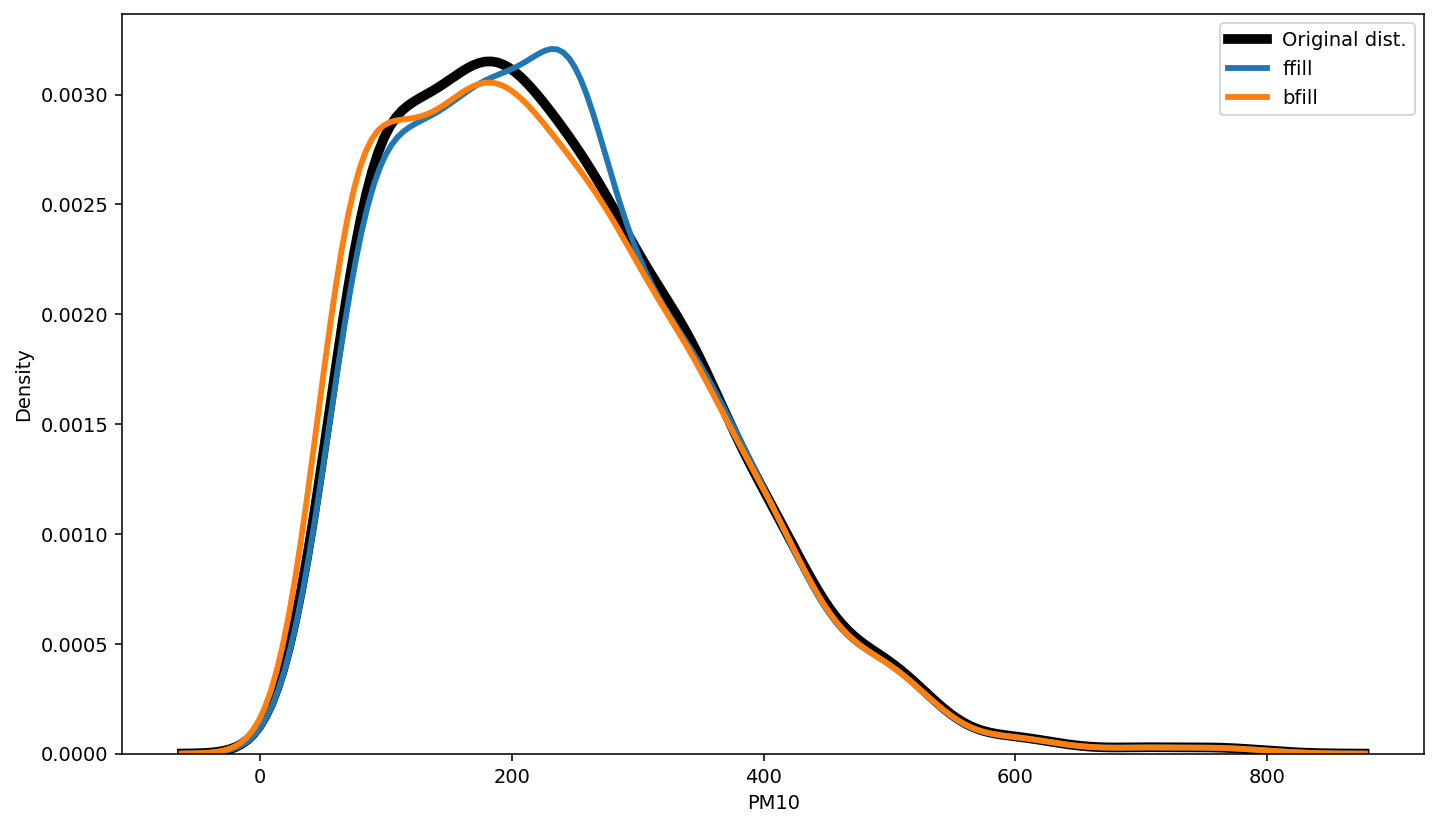

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM10'].{method}()")

compare_dists(data_delhi["PM10"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
clone2

PM2.5    PM10     NO    NO2  ...     O3    AQI   ffill   bfill
Date                                      ...                              
2015-01-01  313.22  607.98  69.16  472.0  ...  41.68  472.0  607.98  607.98
2015-01-02  186.18  269.55  62.09  454.0  ...  29.97  454.0  269.55  269.55
2015-01-03   87.18  131.90  25.73  143.0  ...  19.71  143.0  131.90  131.90
2015-01-04  151.84  241.84  25.01  319.0  ...  25.36  319.0  241.84  241.84
2015-01-05  146.60  219.13  14.01  325.0  ...  23.20  325.0  219.13  219.13
...            ...     ...    ...    ...  ...    ...    ...     ...     ...
2020-06-27   39.80  155.94  10.88  112.0  ...  18.88  112.0  155.94  155.94
2020-06-28   59.52  308.65  12.67  196.0  ...  18.05  196.0  308.65  308.65
2020-06-29   44.86  184.12  10.50  233.0  ...  26.61  233.0  184.12  184.12
2020-06-30   39.80   91.98   5.99  114.0  ...  37.29  114.0   91.98   91.98
2020-07-01   54.01  128.66   6.33  101.0  ...  29.73  101.0  128.66  128.66

[2009 rows x 12 columns]

In [ ]:
clone

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  36.39  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  32.87  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  30.31  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  36.91  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  34.92  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-27   39.80  155.94  10.88  21.46  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  21.60  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  21.57  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  17.96  ...   0.84  10.51  37.29  114.0
2020-07-01   54.01  128.66   6.33  21.05  ...   0.97  11.15  29.73  101.0

[2009 rows x 10 columns]

In [ ]:
# data_delhi["PM10f"]=clone2['ffill']

In [ ]:
data_delhi

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  472.0  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  454.0  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  143.0  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  319.0  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  325.0  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-27   39.80  155.94  10.88  112.0  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  196.0  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  233.0  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  114.0  ...   0.84  10.51  37.29  114.0
2020-07-01   54.01  128.66   6.33  101.0  ...   0.97  11.15  29.73  101.0

[2009 rows x 10 columns]

In [ ]:
# data_delhi["PM10b"]=clone2['bfill']

In [ ]:
# data_delhi['bdiff_PM10']=abs(data_delhi['PM10b']-data_delhi['PM10'])

In [ ]:
# data_delhi['fdiff_PM10']=abs(data_delhi['PM10f']-clone['PM10'])

In [ ]:
# data_delhi["bdiff_PM10"]

In [ ]:
# data_delhi['bdiff_PM10'].mean()

In [ ]:
# data_delhi['bdiff_PM10'].mean()

In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    1932 non-null   float64
 2   NO      2007 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2000 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     1899 non-null   float64
 8   O3      1925 non-null   float64
 9   AQI     1999 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_delhi['PM10']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


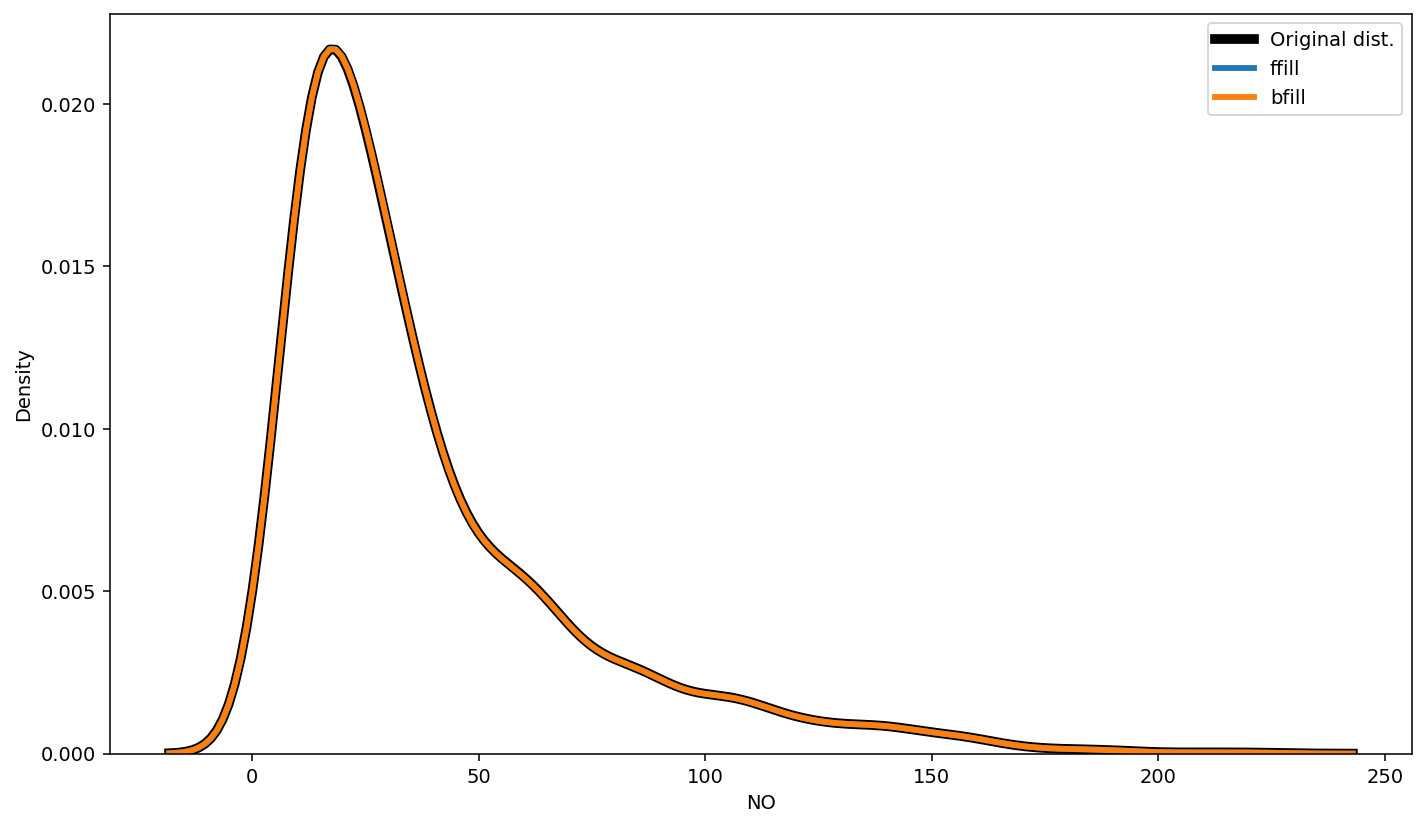

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO'].{method}()")

compare_dists(data_delhi["NO"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NO']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


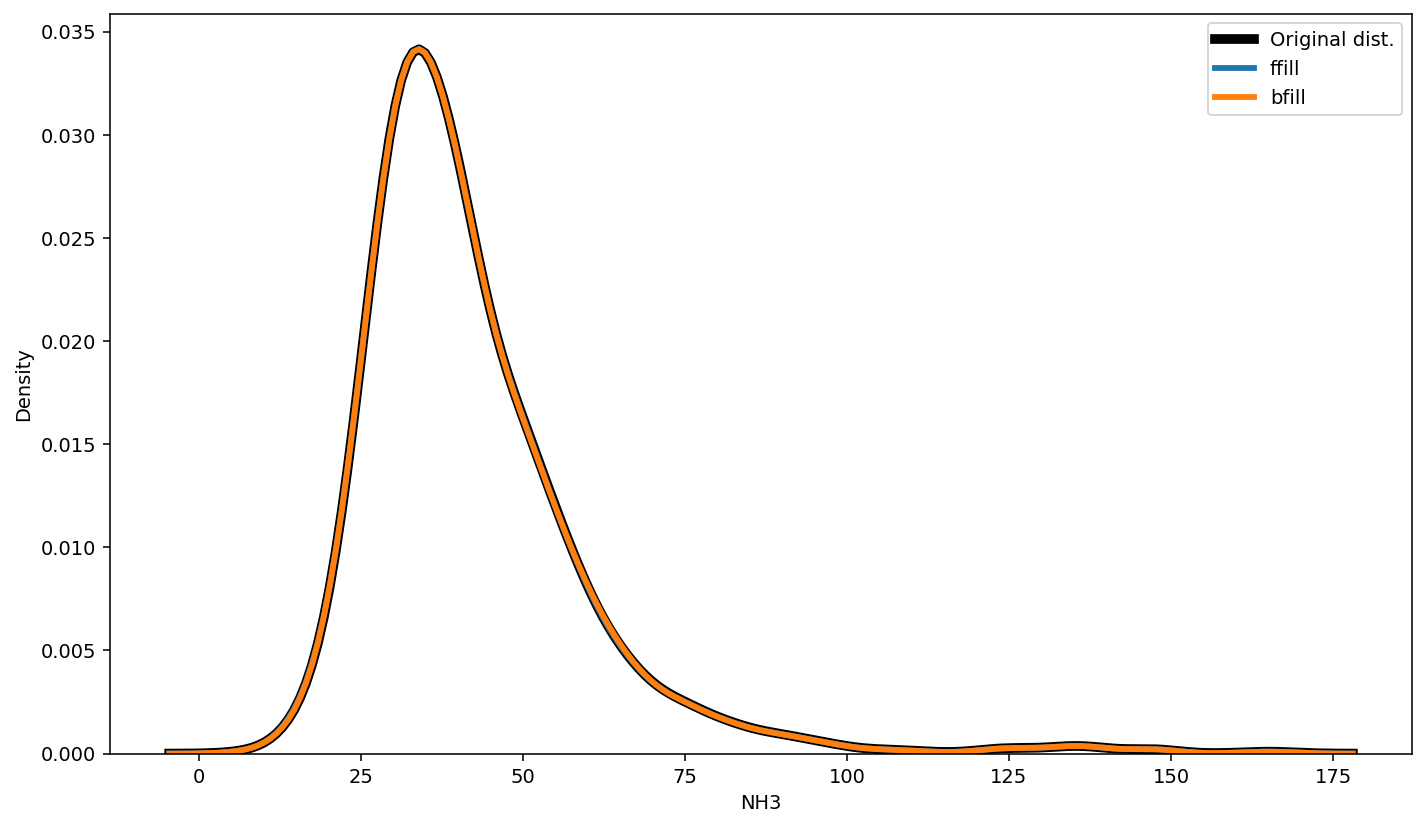

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NH3'].{method}()")

compare_dists(data_delhi["NH3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NH3']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


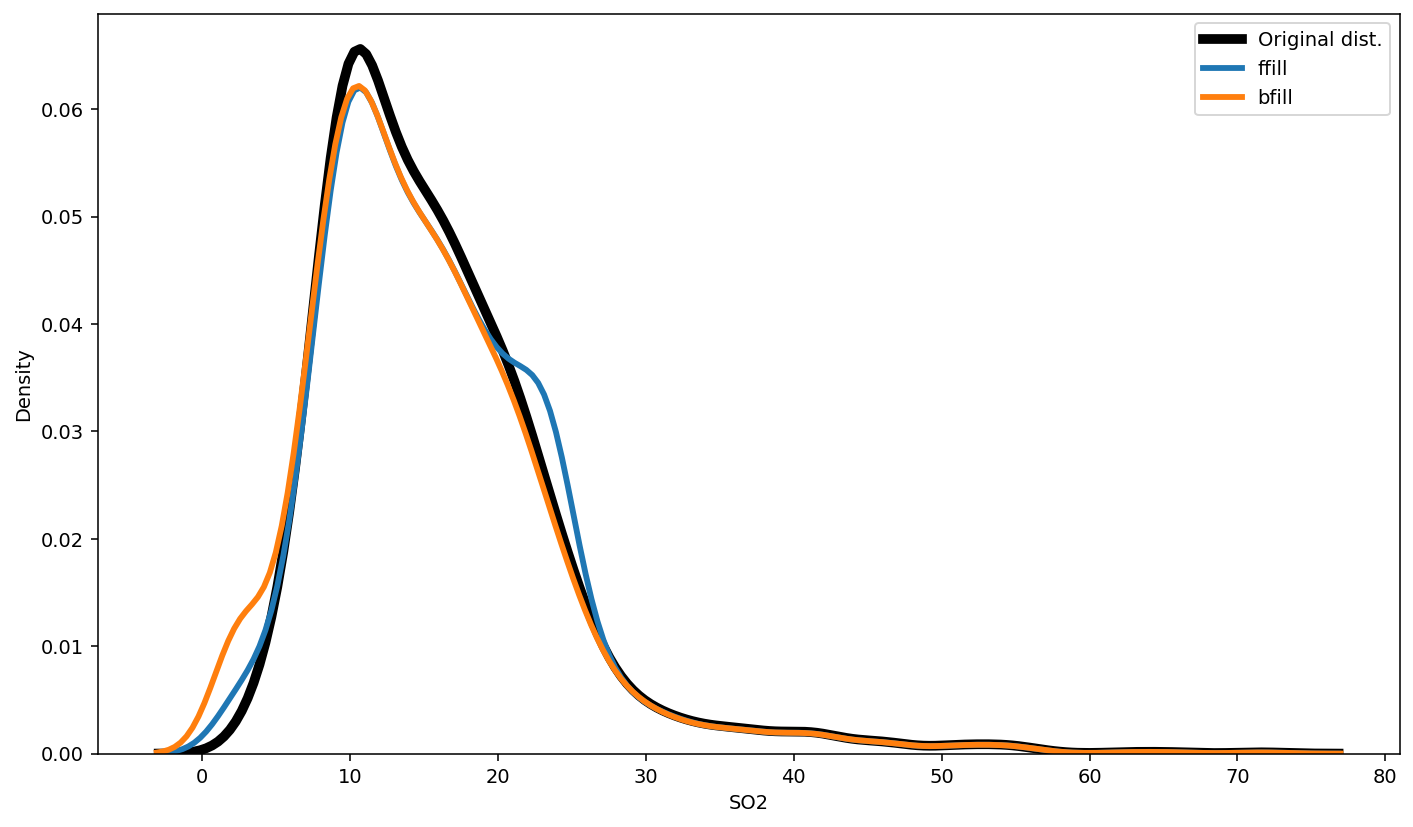

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()")

compare_dists(data_delhi["SO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['SO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


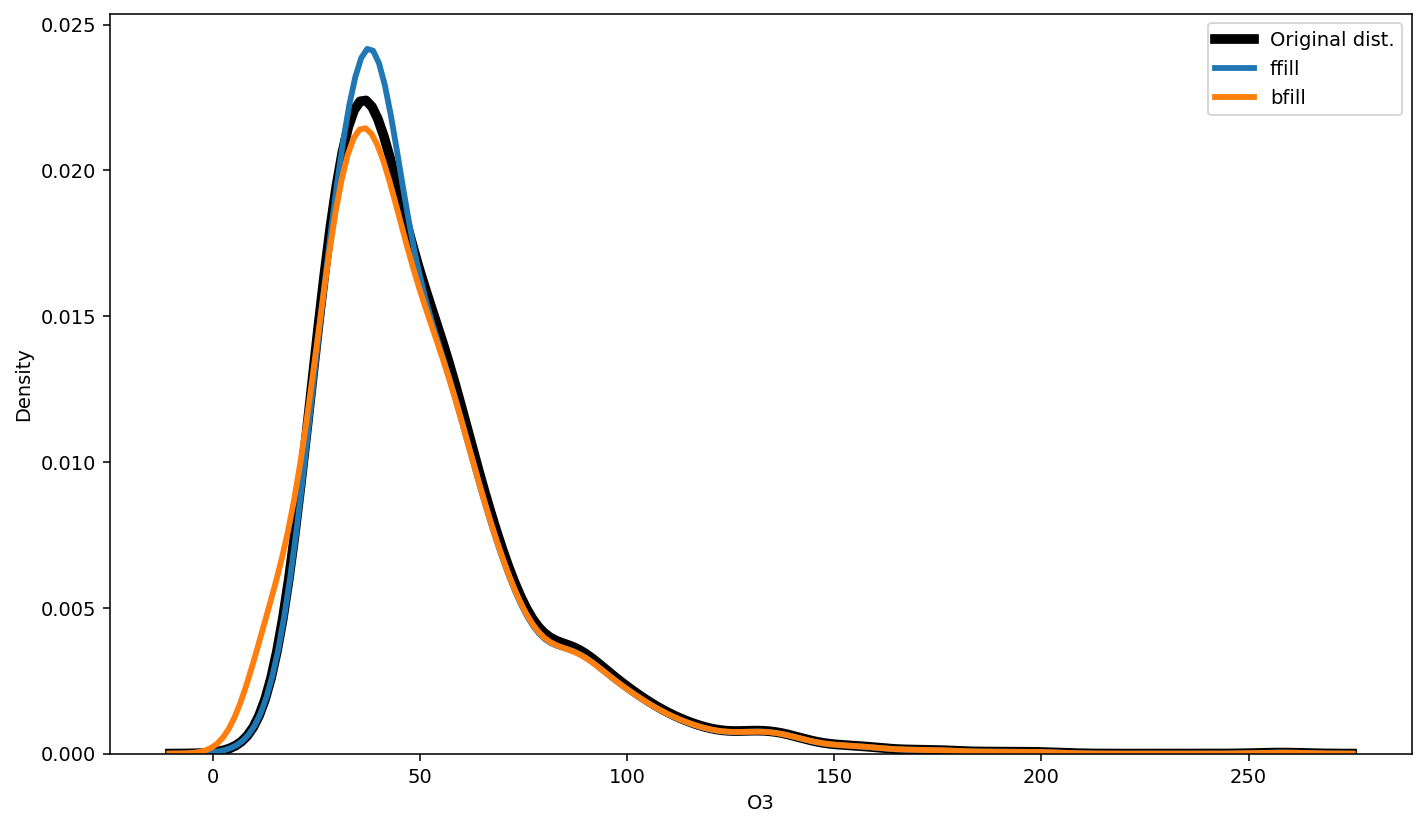

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['O3'].{method}()")

compare_dists(data_delhi["O3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['O3']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


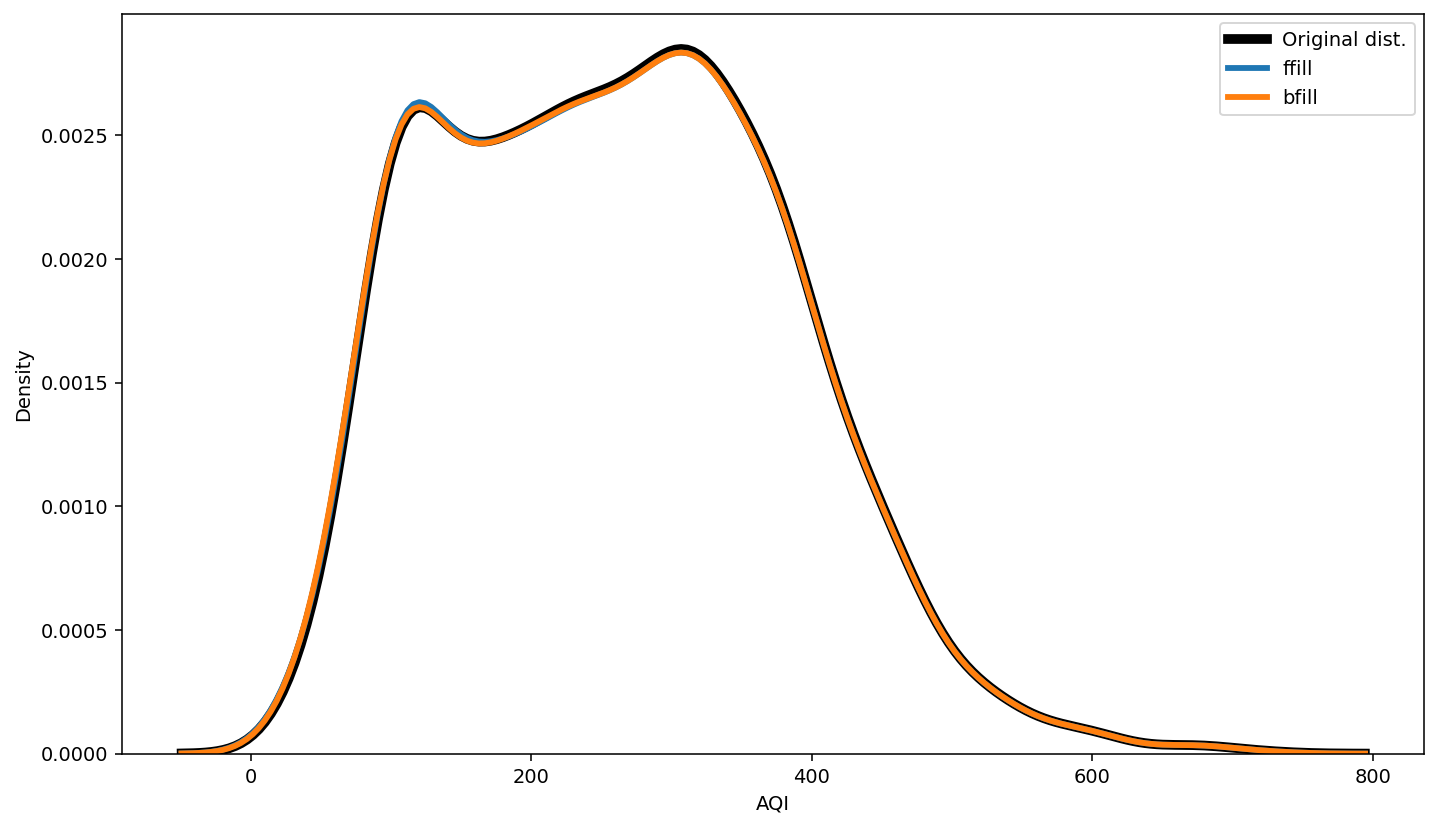

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()")

compare_dists(data_delhi["AQI"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['AQI']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    2009 non-null   float64
 2   NO      2009 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2009 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     2009 non-null   float64
 8   O3      2009 non-null   float64
 9   AQI     2009 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_month=data_delhi.resample("M").mean()

In [ ]:
data_month

PM2.5        PM10         NO  ...        SO2         O3         AQI
Date                                           ...                                  
2015-01-31  175.690645  276.971290  26.392581  ...   5.594194  25.868710  342.290323
2015-02-28  153.920357  234.939643  29.287857  ...   7.863214  30.829643  327.928571
2015-03-31   80.338065  135.044516  15.010000  ...   7.387097  28.738387  256.064516
2015-04-30   91.562333  187.991333  18.510667  ...  16.101333  58.172000  305.266667
2015-05-31   97.109355  271.050645  30.833871  ...  16.129032  69.061613  348.580645
...                ...         ...        ...  ...        ...        ...         ...
2020-03-31   57.506452  122.189032  21.949677  ...  14.000000  37.859355  135.838710
2020-04-30   44.940000  104.877667   9.710000  ...  15.493667  46.185667  113.000000
2020-05-31   55.448710  137.662258   9.770323  ...  15.425161  56.768065  148.645161
2020-06-30   46.694667  121.209333   8.458667  ...  12.402000  39.616000  125.733333
2020-07-31   54.010000  128.660000   6.330000  ...  11.150000  29.730000  101.000000

[67 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


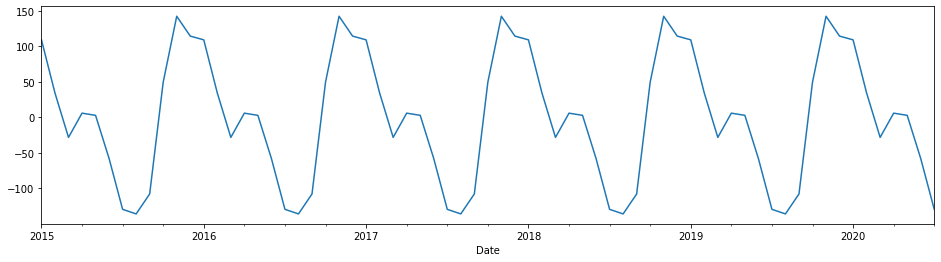

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

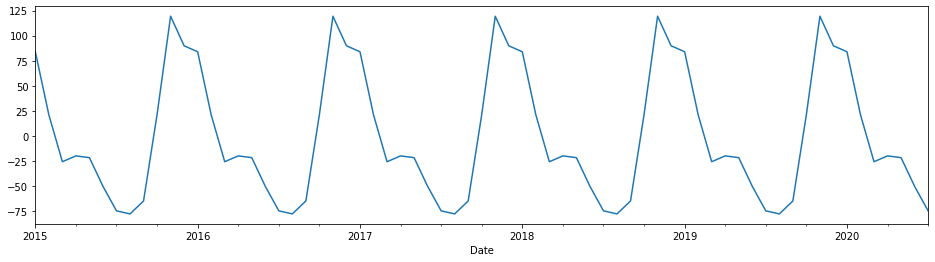

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["PM2.5"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

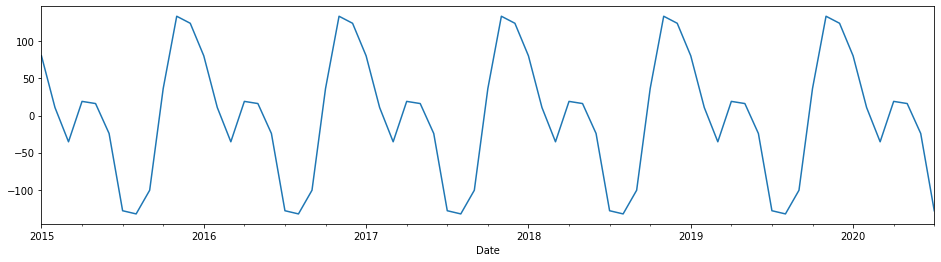

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["PM10"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

#Splitting on Months

In [ ]:
data_delhi["2015-03-01":"2015-06-30"]

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-03-01   71.83   98.89   8.49  324.0  ...  11.62  10.99  22.51  324.0
2015-03-02   53.71   60.15  11.02  226.0  ...  10.19   3.21  22.08  226.0
2015-03-03   83.49  112.10  16.23  266.0  ...  11.72   5.07  20.83  266.0
2015-03-04   91.07  139.15  13.71  200.0  ...  10.64   4.68  25.83  200.0
2015-03-05  106.57  196.19  25.97  275.0  ...   9.36   5.97  32.88  275.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2015-06-26   76.00  182.48  32.60  192.0  ...   1.04   6.84  60.99  192.0
2015-06-27   69.46  195.20  19.12  207.0  ...   1.01   7.28  53.19  207.0
2015-06-28   79.84  214.78  20.29  219.0  ...   1.13   7.53  58.34  219.0
2015-06-29   48.50   96.78   5.47  193.0  ...   1.07   7.74  52.21  193.0
2015-06-30   53.79  109.92   8.54  170.0  ...   1.05   9.15  58.33  170.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2016-03-01":"2016-06-30"]

PM2.5    PM10      NO    NO2  ...    CO    SO2      O3    AQI
Date                                       ...                            
2016-03-01  213.62  299.88  113.63  370.0  ...  2.43  25.49  138.30  370.0
2016-03-02  175.63  244.58  123.21  365.0  ...  1.94  25.53  157.07  365.0
2016-03-03  165.22  264.31  116.23  348.0  ...  2.61  33.45  113.89  348.0
2016-03-04  115.55  201.71   28.05  312.0  ...  1.36  16.60  103.88  312.0
2016-03-05   53.00  129.37    9.63  214.0  ...  0.73  19.05   84.88  214.0
...            ...     ...     ...    ...  ...   ...    ...     ...    ...
2016-06-26   48.00   86.63    4.54  158.0  ...  0.85   8.71   58.37  158.0
2016-06-27   76.76  112.46    5.66  154.0  ...  1.71   7.63   51.76  154.0
2016-06-28   80.89   96.05   12.43  187.0  ...  3.00   9.77   55.61  187.0
2016-06-29   60.67   68.43    7.96  180.0  ...  2.08  10.22   44.44  180.0
2016-06-30   69.65  103.25    9.49  190.0  ...  2.39   9.43   51.31  190.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2017-03-01":"2017-06-30"]

PM2.5    PM10      NO    NO2  ...    CO    SO2     O3    AQI
Date                                       ...                           
2017-03-01  127.90  359.47  122.04  397.0  ...  0.92  24.07  45.24  397.0
2017-03-02  114.68  300.55   64.39  280.0  ...  0.47  23.53  35.22  280.0
2017-03-03   67.83  181.19   45.45  190.0  ...  0.57  19.69  32.02  206.0
2017-03-04   82.32  196.84   48.61  190.0  ...  0.57  22.03  27.77  190.0
2017-03-05   90.60  229.62   42.58  210.0  ...  0.69  25.34  31.88  210.0
...            ...     ...     ...    ...  ...   ...    ...    ...    ...
2017-06-26   51.52  359.19   20.96  108.0  ...  0.00   2.34  39.61  108.0
2017-06-27   36.62  286.38   16.90   73.0  ...  0.00   2.34  39.61   73.0
2017-06-28   29.83  128.18   30.92   58.0  ...  0.00   2.34  39.61   58.0
2017-06-29   22.98  103.80   21.60   58.0  ...  0.00   2.34  39.61   58.0
2017-06-30   25.83   90.41   44.88   46.0  ...  0.00   2.34  39.61   46.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2018-03-01":"2018-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2018-03-01  120.71  256.86  45.93  293.0  ...  1.43  14.90  40.69  293.0
2018-03-02  139.18  253.32  46.05  300.0  ...  1.64  11.52  45.55  300.0
2018-03-03   98.25  205.92  26.84  244.0  ...  1.18  12.93  38.38  244.0
2018-03-04   79.83  182.26  25.27  205.0  ...  0.99  12.95  34.95  205.0
2018-03-05   76.96  164.74  24.87  180.0  ...  0.99  12.70  40.45  180.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2018-06-26   29.98   92.12   8.89  128.0  ...  0.72  13.16  33.09  128.0
2018-06-27   52.48  111.40   9.03  126.0  ...  0.84  10.43  44.04  126.0
2018-06-28   30.07   71.42   8.68   99.0  ...  0.76   8.48  33.17   99.0
2018-06-29   37.11   84.12  10.99   90.0  ...  0.87   9.36  31.43   90.0
2018-06-30   41.41  103.75  10.42  113.0  ...  0.91   9.55  31.21  113.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2019-03-01":"2019-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2019-03-01   93.83  181.26  37.55  222.0  ...  1.17  15.81  37.75  222.0
2019-03-02  109.60  182.54  40.68  172.0  ...  1.36  17.96  25.07  227.0
2019-03-03   62.92  105.16  20.21  172.0  ...  1.16  13.48  33.59  172.0
2019-03-04  105.93  180.84  49.62  217.0  ...  1.54  14.75  38.13  217.0
2019-03-05   68.86  135.40  18.77  173.0  ...  1.01  14.26  36.30  173.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-06-26   67.36  155.90  15.67  161.0  ...  1.16  12.87  46.26  161.0
2019-06-27   65.30  230.98  17.87  169.0  ...  1.16  13.46  46.84  169.0
2019-06-28   61.21  239.15  19.71  207.0  ...  1.02  14.43  38.39  207.0
2019-06-29   58.08  271.27  16.84  223.0  ...  0.93  11.99  37.99  223.0
2019-06-30   65.24  270.03  22.46  234.0  ...  1.04  12.82  44.40  234.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2020-03-01":"2020-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-01  42.83   91.88  20.57  105.0  ...  0.97  12.19  39.84  105.0
2020-03-02  99.34  203.51  64.58  192.0  ...  1.58  15.81  36.64  192.0
2020-03-03  86.26  188.73  50.52  226.0  ...  1.22  15.48  32.39  226.0
2020-03-04  82.90  193.79  40.18  200.0  ...  1.10  16.22  41.77  200.0
2020-03-05  31.43   67.50  11.78  112.0  ...  0.81  11.32  36.98  112.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-26  50.01  112.08   9.67  104.0  ...  1.01  11.66  24.82  104.0
2020-06-27  39.80  155.94  10.88  112.0  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  196.0  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  233.0  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  114.0  ...  0.84  10.51  37.29  114.0

[122 rows x 10 columns]

In [ ]:
data_delhi_summer=data_delhi["2015-03-01":"2015-06-30"]

In [ ]:
data_delhi_monsoon=data_delhi["2015-07-01":"2015-10-31"]

In [ ]:
data_delhi_winter=data_delhi["2015-11-01":"2016-02-29"]

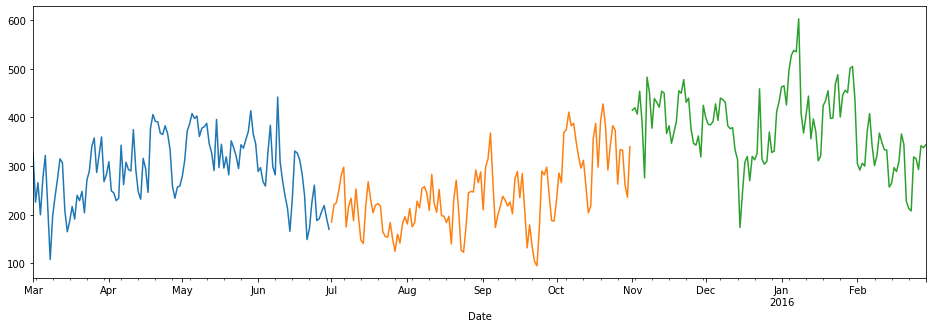

In [ ]:
data_delhi_summer["AQI"].plot(figsize=(16, 5))
data_delhi_monsoon["AQI"].plot()
data_delhi_winter["AQI"].plot()

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2016-03-01":"2016-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2017-03-01":"2017-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2018-03-01":"2018-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2019-03-01":"2019-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2020-03-01":"2020-06-30"])

In [ ]:
x=data_delhi_summer.groupby([data_delhi_summer.index.month, data_delhi_summer.index.day]).mean()

In [ ]:
x.head(120)

PM2.5        PM10         NO  ...        SO2         O3         AQI
Date Date                                     ...                                  
3    1     111.786667  214.706667  58.035000  ...  17.241667  54.055000  285.166667
     2     115.356667  207.441667  58.321667  ...  16.260000  53.605000  265.000000
     3      93.995000  176.235000  45.913333  ...  16.683333  45.183333  243.666667
     4      92.933333  182.431667  34.240000  ...  14.538333  45.388333  220.666667
     5      71.236667  153.803333  22.266667  ...  14.773333  43.895000  194.000000
...               ...         ...        ...  ...        ...        ...         ...
6    24     66.843333  183.826667  18.831667  ...   9.158333  57.626667  173.166667
     25     53.288333  152.713333  11.821667  ...   9.373333  47.428333  171.833333
     26     53.811667  164.733333  15.388333  ...   9.263333  43.856667  141.833333
     27     56.736667  182.060000  13.243333  ...   8.586667  42.386667  140.166667
     28     56.893333  176.371667  17.450000  ...   8.875000  40.528333  161.000000

[120 rows x 10 columns]

In [ ]:
data_delhi_summer

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-03-01   71.83   98.89   8.49  324.0  ...  11.62  10.99  22.51  324.0
2015-03-02   53.71   60.15  11.02  226.0  ...  10.19   3.21  22.08  226.0
2015-03-03   83.49  112.10  16.23  266.0  ...  11.72   5.07  20.83  266.0
2015-03-04   91.07  139.15  13.71  200.0  ...  10.64   4.68  25.83  200.0
2015-03-05  106.57  196.19  25.97  275.0  ...   9.36   5.97  32.88  275.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-26   50.01  112.08   9.67  104.0  ...   1.01  11.66  24.82  104.0
2020-06-27   39.80  155.94  10.88  112.0  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  196.0  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  233.0  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  114.0  ...   0.84  10.51  37.29  114.0

[732 rows x 10 columns]

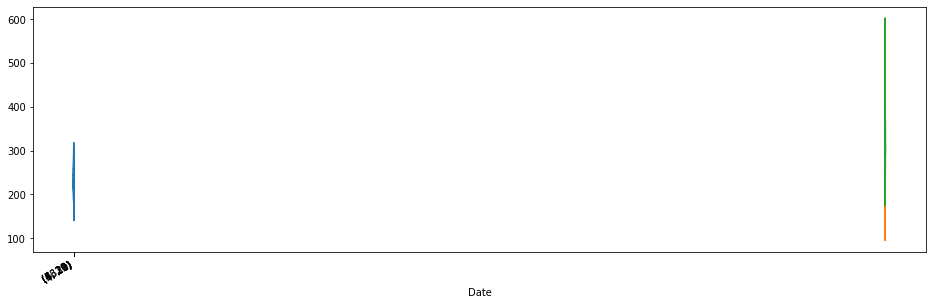

In [ ]:
x["AQI"].plot(figsize=(16, 5))
data_delhi_monsoon["AQI"].plot()
data_delhi_winter["AQI"].plot()

In [ ]:
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2016-07-01":"2016-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2017-07-01":"2017-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2018-07-01":"2018-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2019-07-01":"2019-10-31"])

In [ ]:
data_delhi_monsoon

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2015-07-01   57.99  135.43   8.88  185.0  ...  1.06   8.88  61.42  185.0
2015-07-02   67.12  175.90  12.29  225.0  ...  1.12   6.86  61.70  220.0
2015-07-03   65.25  219.31  19.11  225.0  ...  0.99   8.91  59.66  225.0
2015-07-04   88.75  212.16  20.90  250.0  ...  0.98   7.24  56.61  250.0
2015-07-05  135.92  435.20  19.63  298.0  ...  1.17   6.42  58.36  282.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-10-27  198.81  321.68  46.63  354.0  ...  1.77  13.21  47.27  354.0
2019-10-28  301.39  420.35  35.11  417.0  ...  1.77  18.03  42.79  417.0
2019-10-29  287.56  440.77  58.36  419.0  ...  2.43  12.71  33.20  419.0
2019-10-30  279.32  454.35  87.70  452.0  ...  2.67  13.81  34.86  452.0
2019-10-31  314.32  500.04  99.58  591.0  ...  2.92  15.86  38.29  460.0

[615 rows x 10 columns]

In [ ]:
data_delhi_monsoon_avg=data_delhi_monsoon.groupby([data_delhi_monsoon.index.month, data_delhi_monsoon.index.day]).mean()

In [ ]:
data_delhi_monsoon_avg

PM2.5     PM10      NO    NO2  ...     CO     SO2      O3    AQI
Date Date                                   ...                              
7    1      50.200  152.056  20.976  146.0  ...  1.002   7.988  44.894  146.0
     2      50.160  170.312  14.288  148.0  ...  1.138   7.570  48.082  147.0
     3      52.820  157.024  15.522  142.4  ...  1.124   7.976  46.052  142.4
     4      68.910  109.938  16.696  159.6  ...  0.918   7.670  44.486  159.6
     5      70.890  178.226  19.988  183.6  ...  1.108   7.892  43.472  180.4
...            ...      ...     ...    ...  ...    ...     ...     ...    ...
10   27    196.374  364.058  70.822  397.4  ...  1.914  19.900  65.808  397.4
     28    227.244  376.374  64.218  420.4  ...  1.820  21.606  77.076  420.4
     29    230.664  373.684  81.072  394.4  ...  2.160  26.624  76.574  398.8
     30    240.650  381.402  83.080  394.4  ...  2.322  22.852  98.416  401.2
     31    286.404  404.940  96.560  453.8  ...  2.354  28.510  69.304  421.6

[123 rows x 10 columns]

In [ ]:
data_delhi_winter=data_delhi_winter.append(data_delhi["2016-11-01":"2017-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2017-11-01":"2018-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2018-11-01":"2019-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2019-11-01":"2020-02-28"])

In [ ]:
data_delhi_winter_avg=data_delhi_winter.groupby([data_delhi_winter.index.month, data_delhi_winter.index.day]).mean()

In [ ]:
# data_delhi_winter=data_delhi["2015-11-01":"2016-02-28"]

In [ ]:
data_delhi_winter

PM2.5    PM10      NO    NO2  ...    CO    SO2      O3    AQI
Date                                       ...                            
2015-11-01  277.53  379.38   60.39  415.0  ...  2.41  28.58   84.99  415.0
2015-11-02  232.40  361.00   67.14  420.0  ...  2.05  31.66  136.67  420.0
2015-11-03  244.78  385.66   51.06  454.0  ...  2.09  29.19   99.91  407.0
2015-11-04  293.49  401.49  105.88  454.0  ...  2.54  31.58  114.43  454.0
2015-11-05  161.78  234.94   44.61  388.0  ...  1.76  21.21   75.71  388.0
...            ...     ...     ...    ...  ...   ...    ...     ...    ...
2020-02-24   70.59  145.05   29.23  169.0  ...  1.02  15.94   33.36  169.0
2020-02-25  127.75  224.02   27.87  244.0  ...  1.22  18.24   35.32  244.0
2020-02-26  141.81  258.62   56.86  303.0  ...  1.54  17.61   38.64  303.0
2020-02-27  107.28  203.77   22.85  270.0  ...  1.23  14.70   36.36  270.0
2020-02-28   83.48  161.36    8.21  214.0  ...  0.97  11.55   41.53  214.0

[601 rows x 10 columns]

In [ ]:
# data_delhi_winter["PM2.5"]=data_delhi_winter["PM2.5"].values+data_delhi["2016-11-01":"2017-02-28"]["PM2.5"].values

In [ ]:
data_delhi_winter["PM2.5"]

Date
2015-11-01    277.53
2015-11-02    232.40
2015-11-03    244.78
2015-11-04    293.49
2015-11-05    161.78
               ...  
2020-02-24     70.59
2020-02-25    127.75
2020-02-26    141.81
2020-02-27    107.28
2020-02-28     83.48
Name: PM2.5, Length: 601, dtype: float64

In [ ]:
data_delhi_winter_avg

PM2.5     PM10       NO    NO2  ...     CO     SO2      O3    AQI
Date Date                                    ...                              
1    1     290.020  447.676   90.838  444.8  ...  2.244  20.708  61.216  444.8
     2     284.544  442.618  108.710  454.8  ...  2.248  19.254  57.358  454.8
     3     265.348  413.748   87.338  431.2  ...  2.062  17.120  52.492  433.4
     4     260.682  404.194   96.070  425.4  ...  2.018  18.300  51.466  425.4
     5     241.336  383.710   76.462  407.6  ...  1.786  18.754  57.692  407.6
...            ...      ...      ...    ...  ...    ...     ...     ...    ...
12   27    230.930  382.654   69.452  371.2  ...  3.638  19.000  52.654  379.6
     28    239.318  404.888   79.098  403.8  ...  3.272  19.402  51.490  403.8
     29    260.364  421.530   62.926  425.8  ...  1.828  19.022  54.708  425.8
     30    281.696  430.316   70.330  440.8  ...  2.008  19.570  53.952  440.8
     31    264.704  404.212   71.964  429.6  ...  1.994  18.856  55.212  429.6

[121 rows x 10 columns]

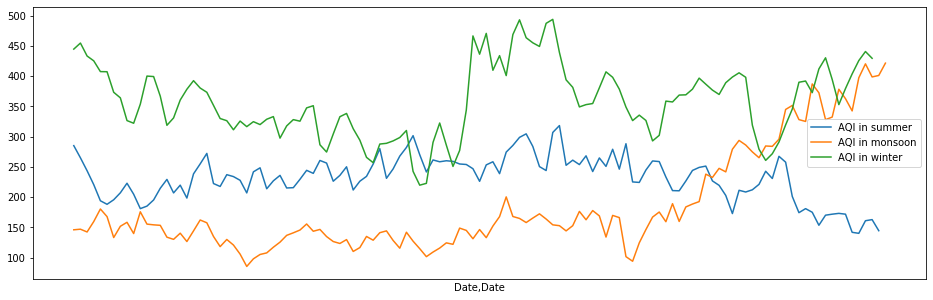

In [ ]:
x["AQI"].plot(figsize=(16, 5), label="AQI in summer")
data_delhi_monsoon_avg["AQI"].plot(label="AQI in monsoon")
data_delhi_winter_avg["AQI"].plot(label="AQI in winter")
plt.xticks([])
plt.legend()
plt.savefig(fname="seasons.jpg", dpi=600)

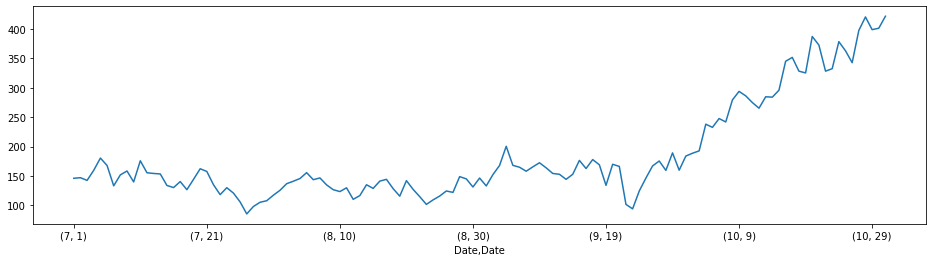

In [ ]:
data_delhi_monsoon_avg["AQI"].plot()


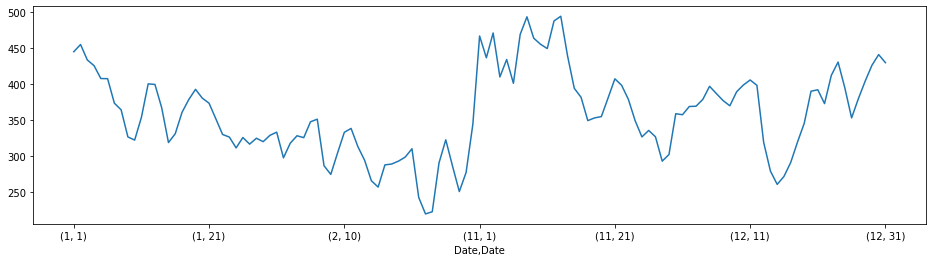

In [ ]:
data_delhi_winter_avg["AQI"].plot()

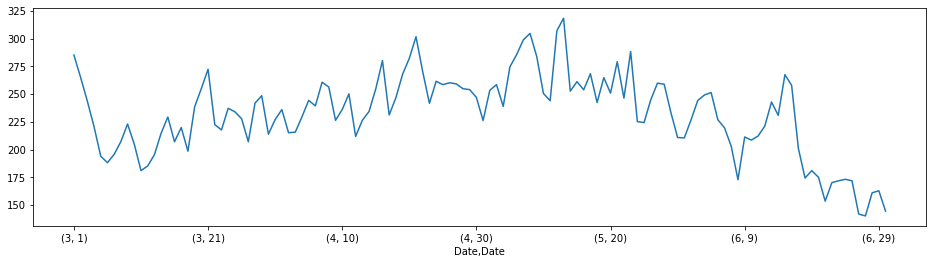

In [ ]:
x["AQI"].plot()

In [ ]:
winter_copy=data_delhi_winter_avg[["PM2.5",	"PM10",	"NO",	"NO2",	"NOx",	"NH3", "CO",	"SO2",	"O3",	"AQI"]]

In [ ]:
winter_copy

PM2.5     PM10       NO    NO2  ...     CO     SO2      O3    AQI
Date Date                                    ...                              
1    1     290.020  447.676   90.838  444.8  ...  2.244  20.708  61.216  444.8
     2     284.544  442.618  108.710  454.8  ...  2.248  19.254  57.358  454.8
     3     265.348  413.748   87.338  431.2  ...  2.062  17.120  52.492  433.4
     4     260.682  404.194   96.070  425.4  ...  2.018  18.300  51.466  425.4
     5     241.336  383.710   76.462  407.6  ...  1.786  18.754  57.692  407.6
...            ...      ...      ...    ...  ...    ...     ...     ...    ...
12   27    230.930  382.654   69.452  371.2  ...  3.638  19.000  52.654  379.6
     28    239.318  404.888   79.098  403.8  ...  3.272  19.402  51.490  403.8
     29    260.364  421.530   62.926  425.8  ...  1.828  19.022  54.708  425.8
     30    281.696  430.316   70.330  440.8  ...  2.008  19.570  53.952  440.8
     31    264.704  404.212   71.964  429.6  ...  1.994  18.856  55.212  429.6

[121 rows x 10 columns]

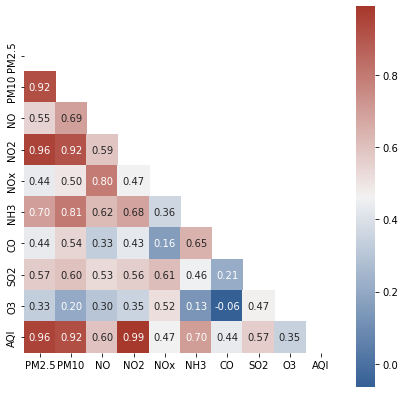

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi_winter_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.savefig(fname="winter_corr.jpg", dpi=600)
plt.show();


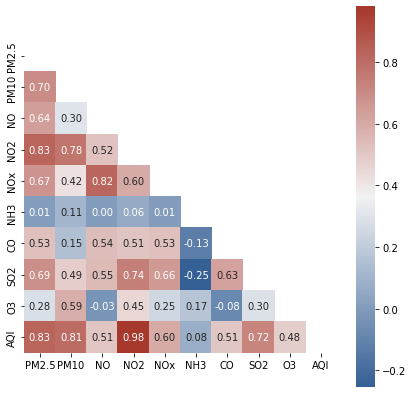

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = x.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.savefig(fname="summer_corr.jpg", dpi=600)
plt.show();


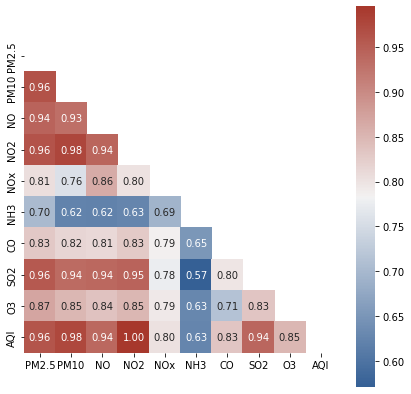

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi_monsoon_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.savefig(fname="monsoon_corr.jpg", dpi=600)
plt.show();


In [ ]:
data_delhi_monsoon

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2015-07-01   57.99  135.43   8.88  185.0  ...  1.06   8.88  61.42  185.0
2015-07-02   67.12  175.90  12.29  225.0  ...  1.12   6.86  61.70  220.0
2015-07-03   65.25  219.31  19.11  225.0  ...  0.99   8.91  59.66  225.0
2015-07-04   88.75  212.16  20.90  250.0  ...  0.98   7.24  56.61  250.0
2015-07-05  135.92  435.20  19.63  298.0  ...  1.17   6.42  58.36  282.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-10-27  198.81  321.68  46.63  354.0  ...  1.77  13.21  47.27  354.0
2019-10-28  301.39  420.35  35.11  417.0  ...  1.77  18.03  42.79  417.0
2019-10-29  287.56  440.77  58.36  419.0  ...  2.43  12.71  33.20  419.0
2019-10-30  279.32  454.35  87.70  452.0  ...  2.67  13.81  34.86  452.0
2019-10-31  314.32  500.04  99.58  591.0  ...  2.92  15.86  38.29  460.0

[615 rows x 10 columns]

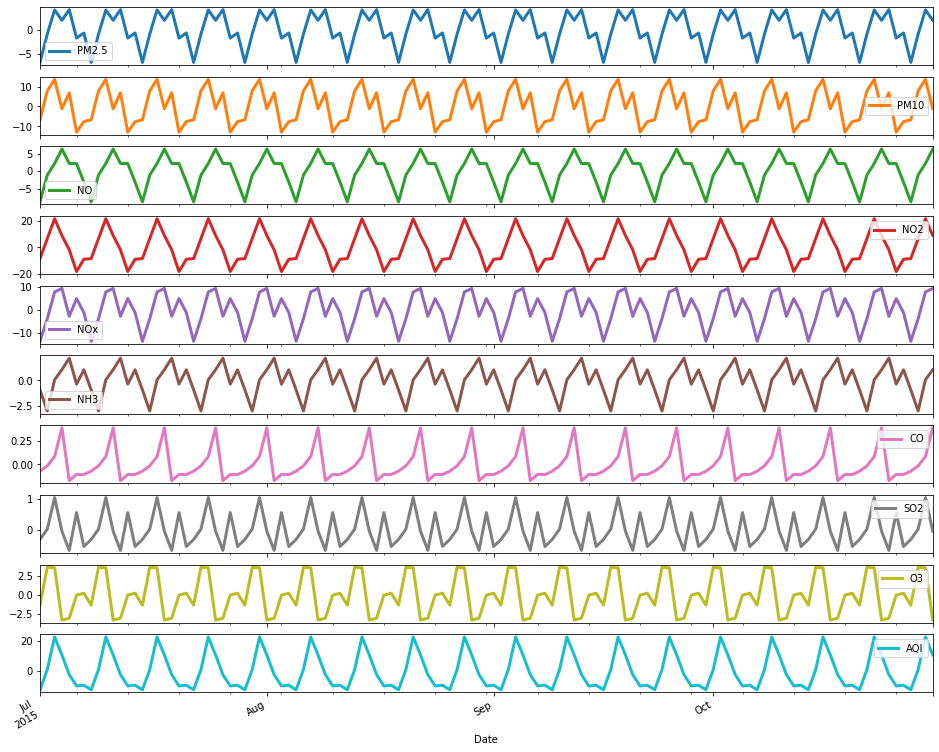

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

seasonality_dict = {}

for ts in data_delhi_monsoon_avg.columns:
    decompositions = sm.tsa.seasonal_decompose(data_delhi_monsoon["2015"][ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict).plot(
    subplots=True, layout=(10, 1), linewidth=3
);

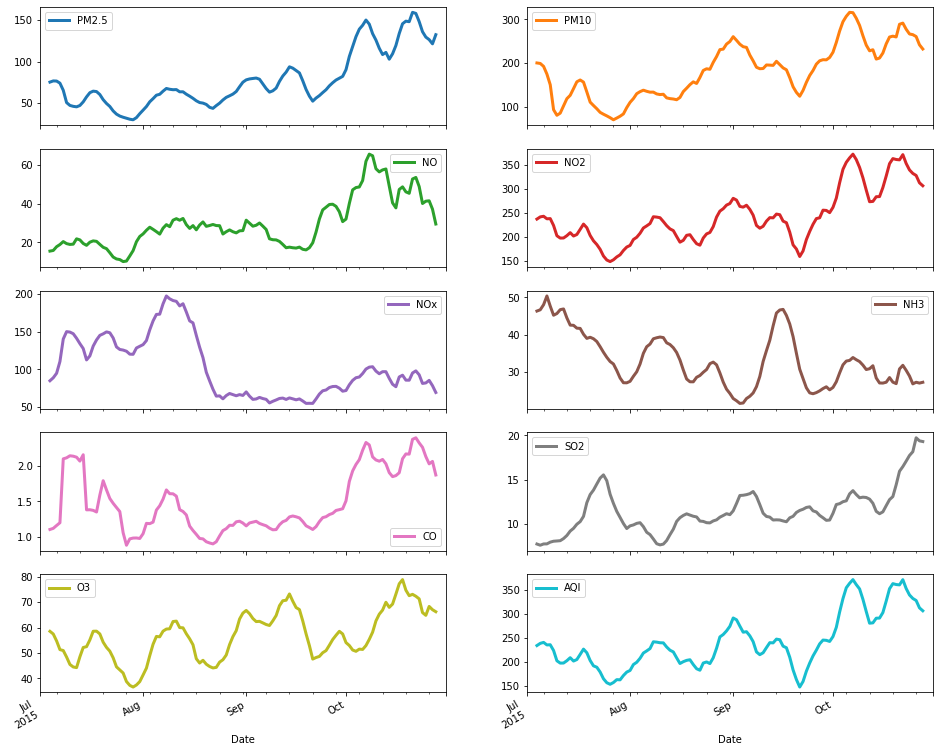

In [ ]:
trend_dict1 = {}

for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

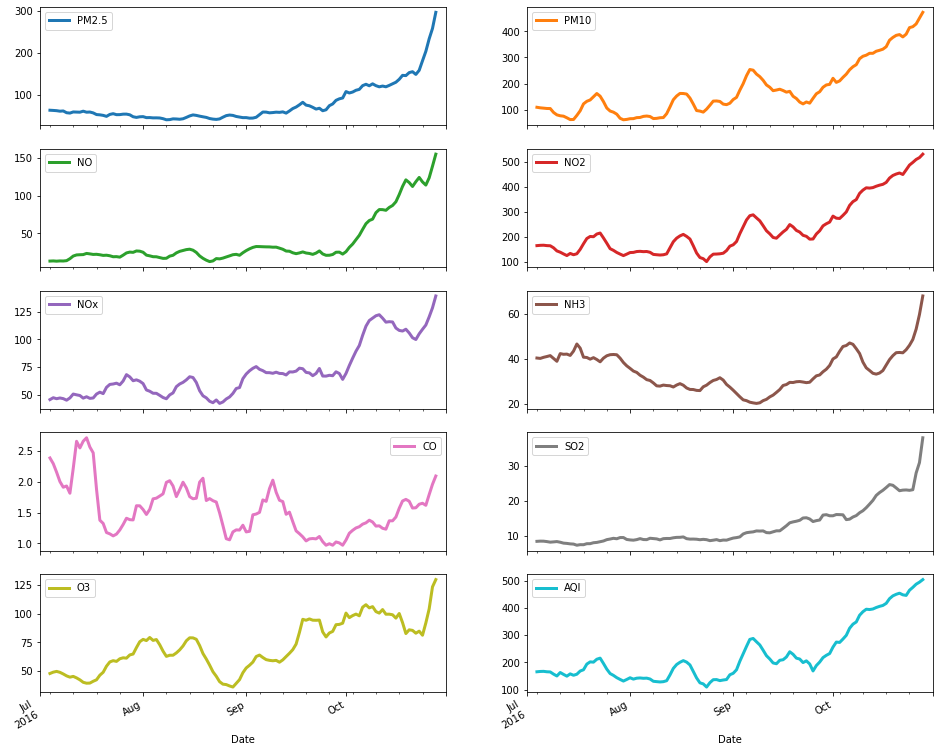

In [ ]:
trend_dict2={}

for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

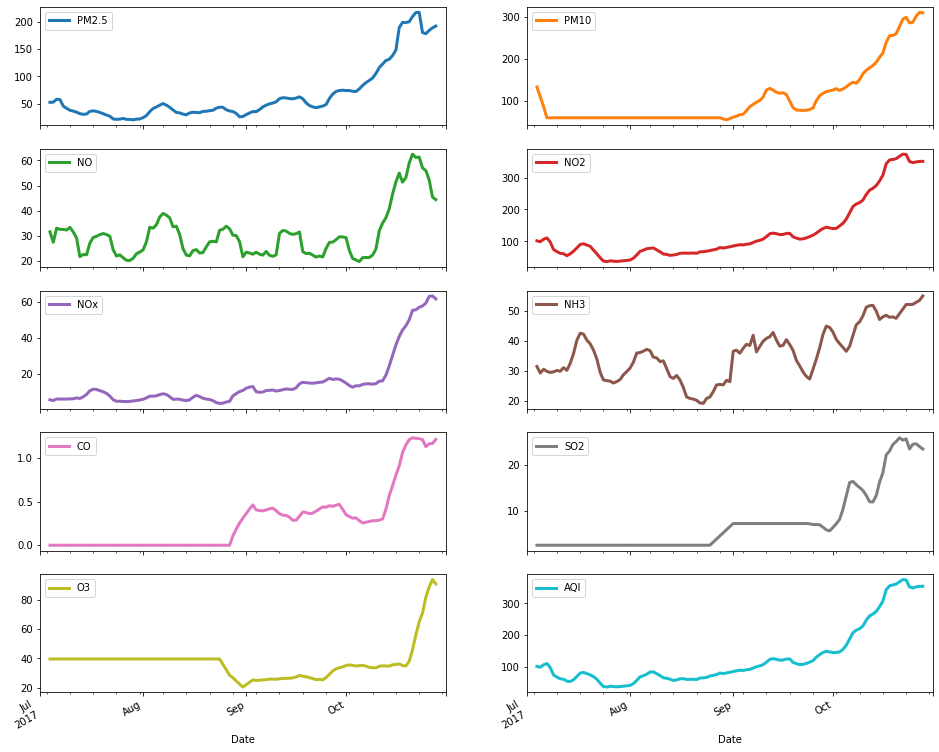

In [ ]:
trend_dict3={}
for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

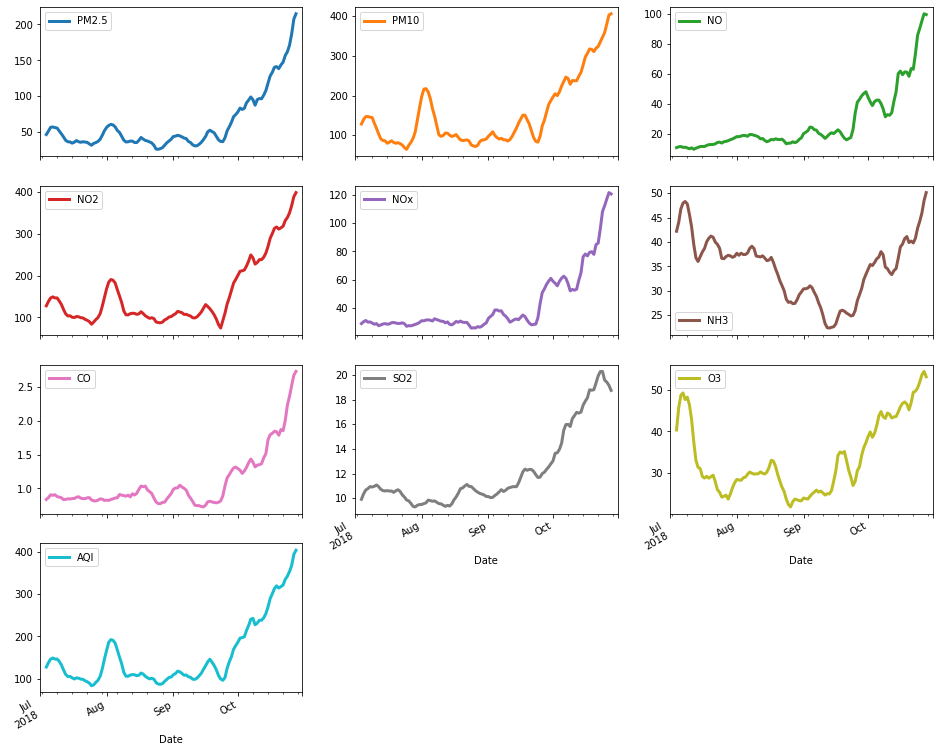

In [ ]:
trend_dict4={}
for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(4, 3), linewidth=3);

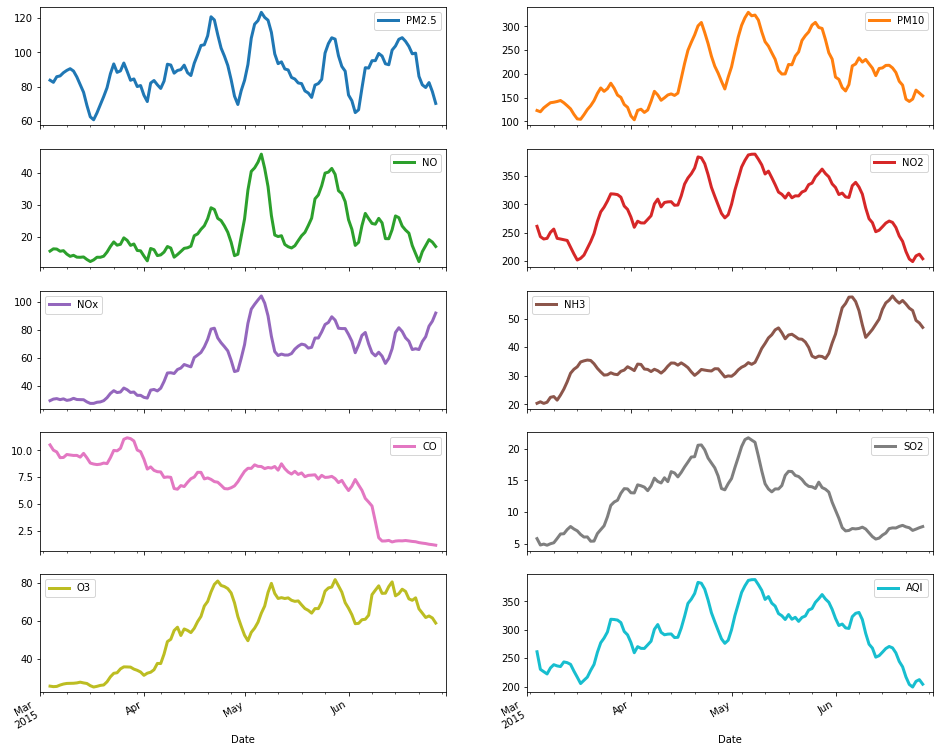

In [ ]:
trend_dict1={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

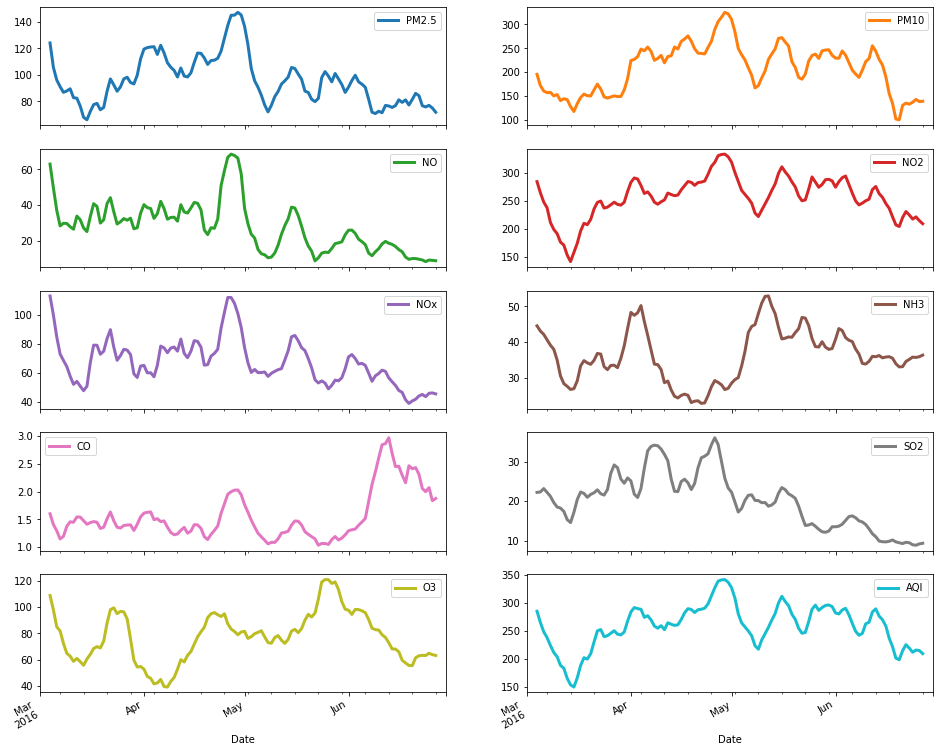

In [ ]:
trend_dict2={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

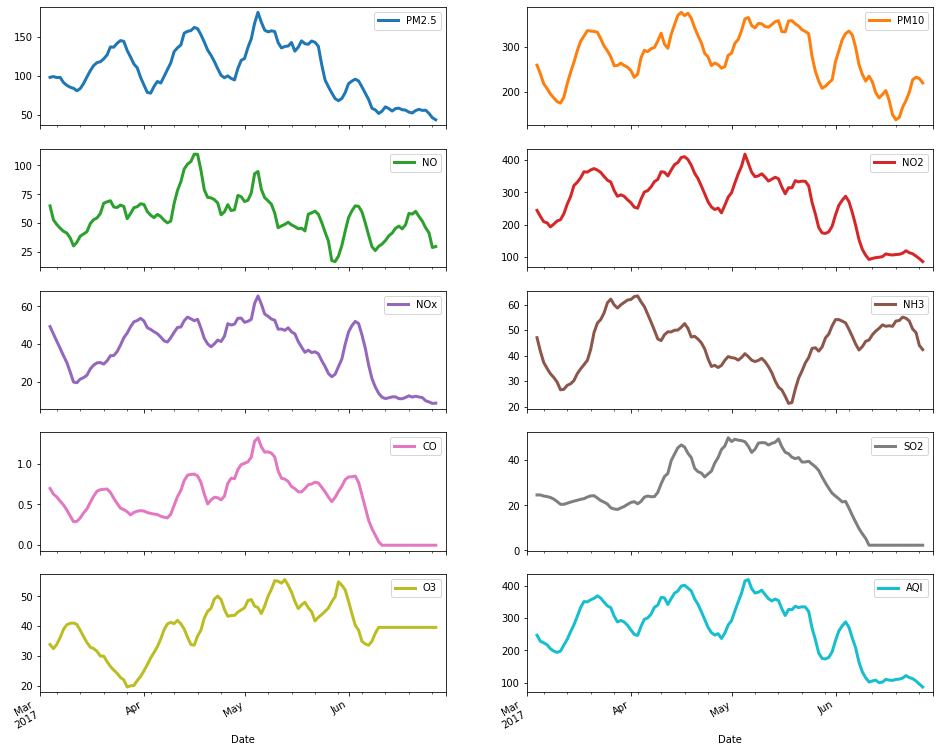

In [ ]:
trend_dict3={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

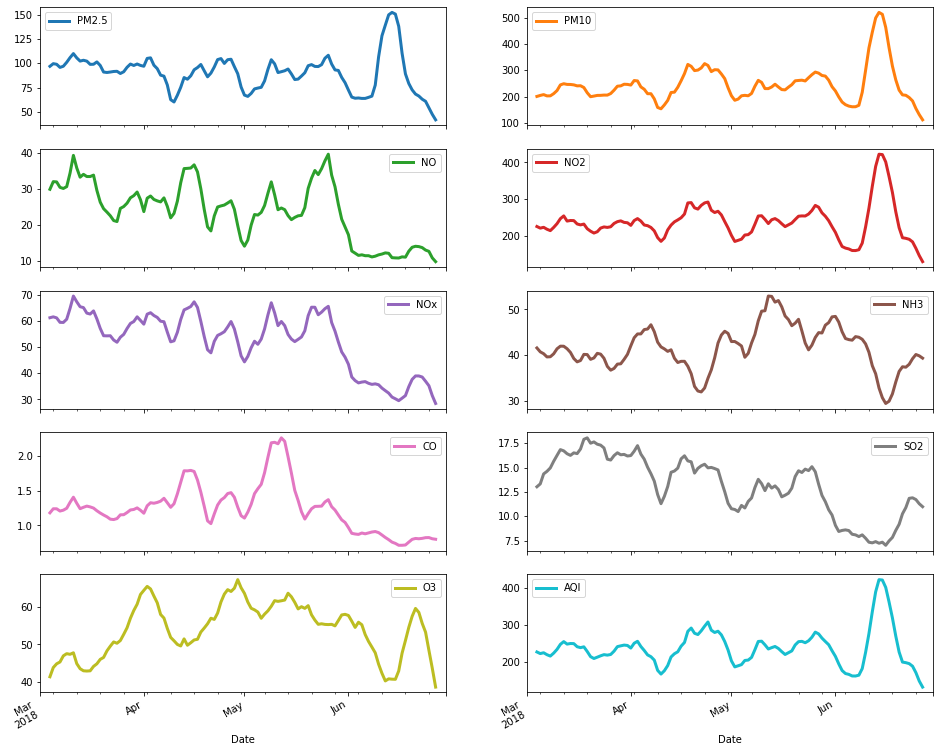

In [ ]:
trend_dict4={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(5, 2), linewidth=3);

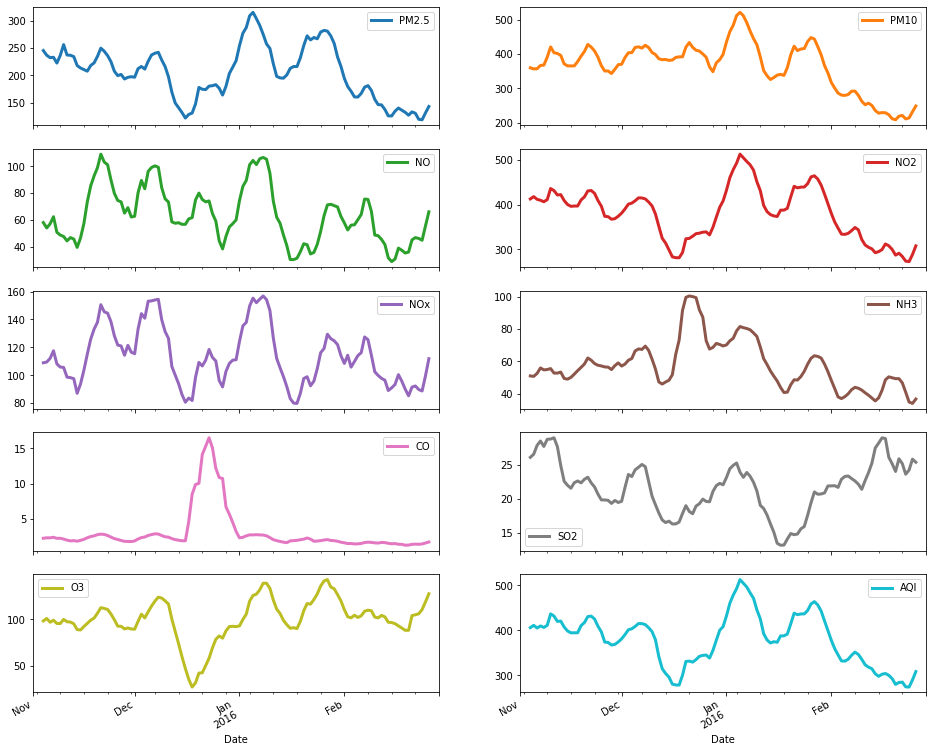

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2015-11-01":"2016-02-29"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

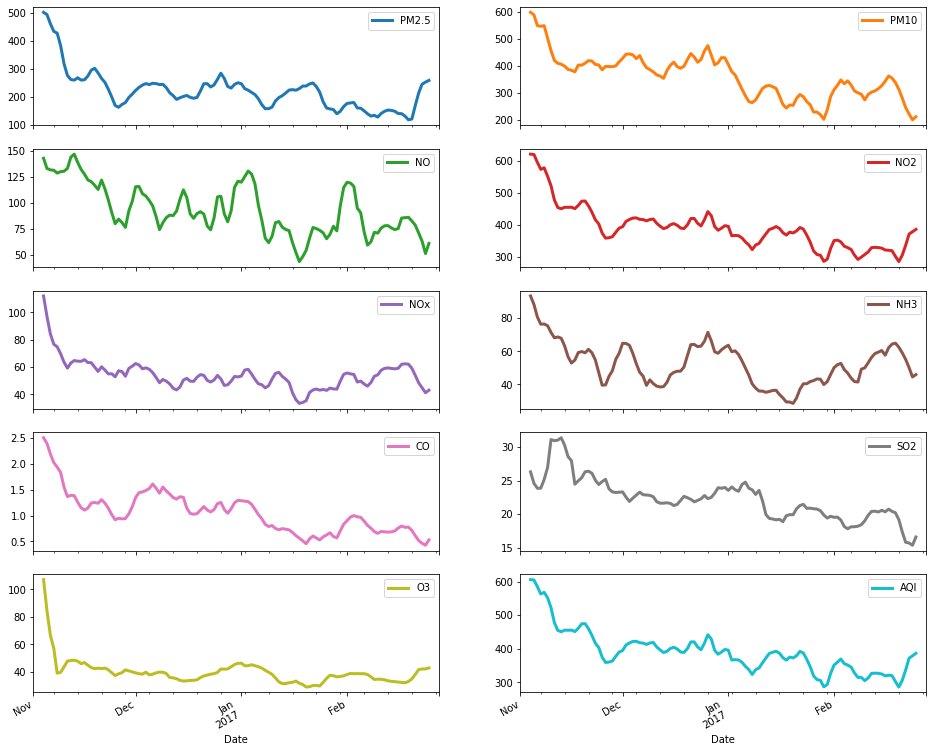

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2016-11-01":"2017-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

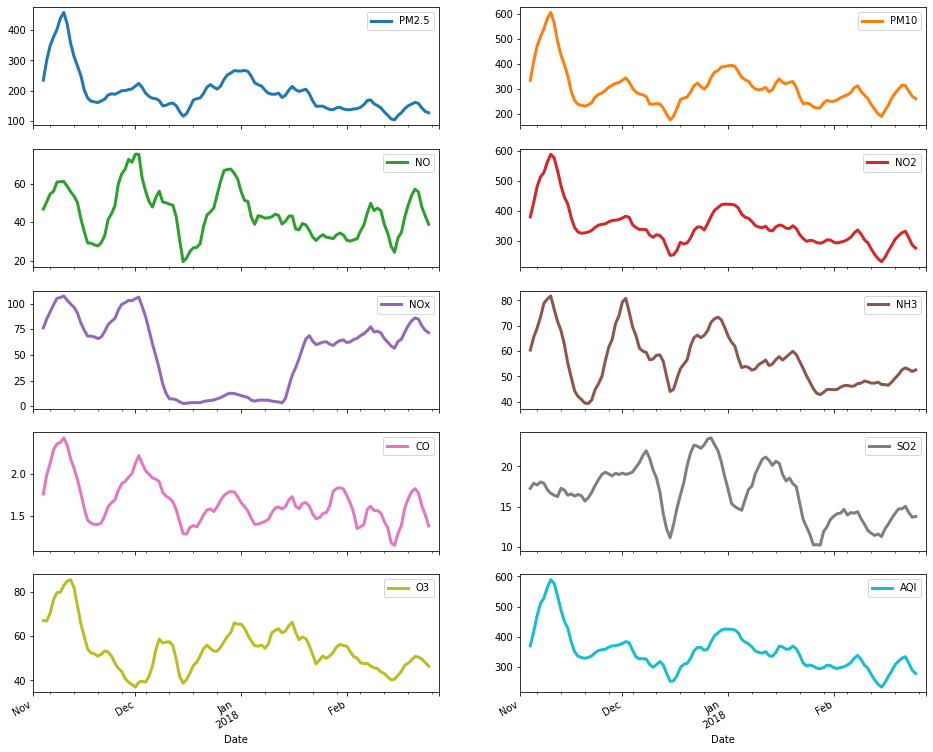

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2017-11-01":"2018-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

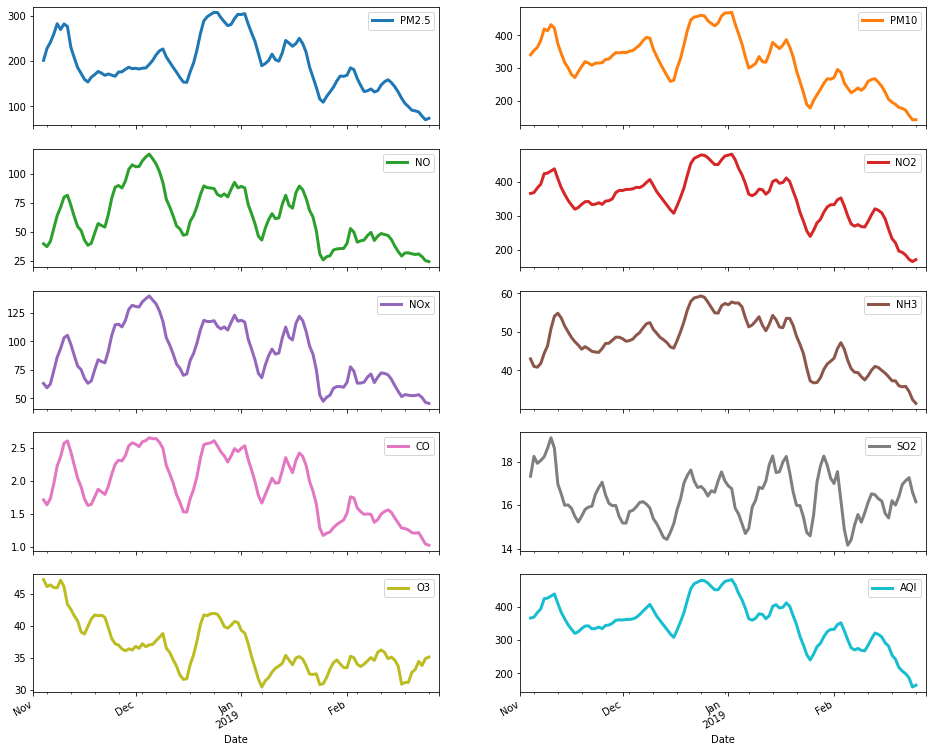

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2018-11-01":"2019-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

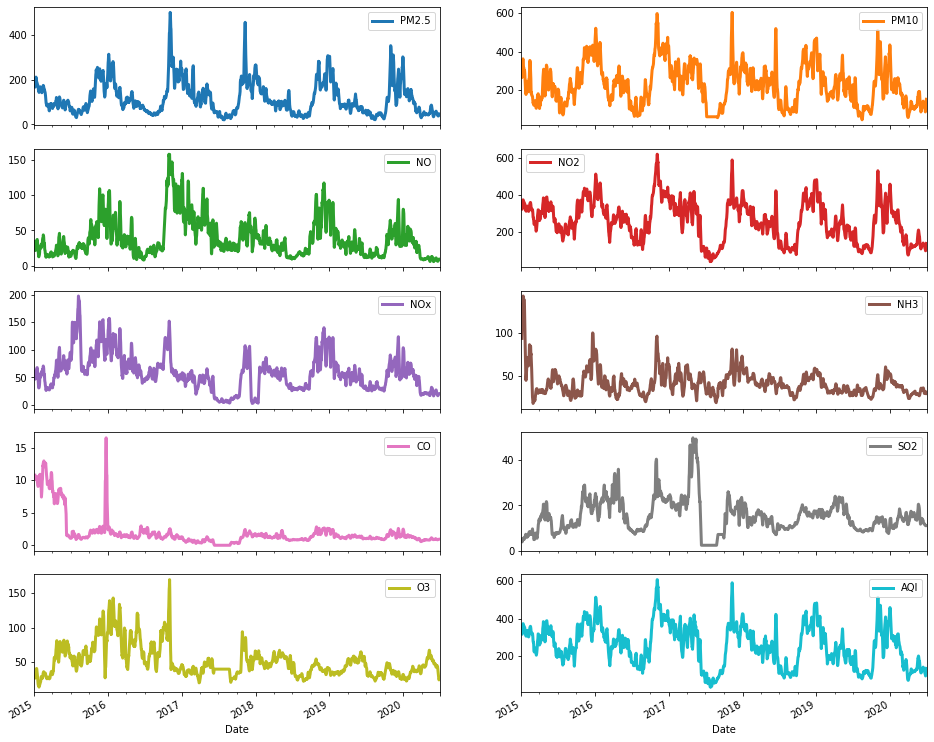

In [ ]:
trend_dict = {}

for ts in data_delhi.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


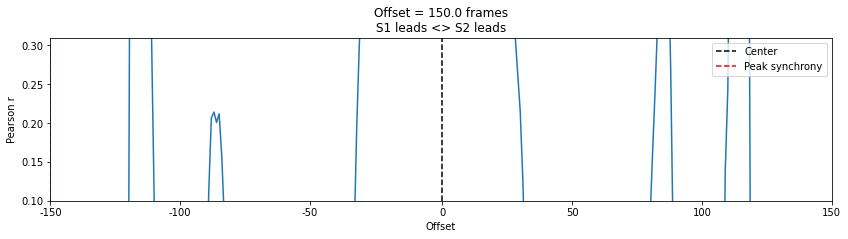

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = data_delhi_monsoon["2018"]['PM2.5']
d2 = data_delhi_monsoon["2018"]['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [ ]:
!pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5315 sha256=e673ec5e178d5b859f1cb9ab5dcab266e3be181e7b3635a37857fa608fb7b3ff
  Stored in directory: /root/.cache/pip/wheels/f9/51/54/b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


In [ ]:
# # Windowed time lagged cross correlation
# seconds = 5
# fps = 30
# no_splits = 20
# samples_per_split = df.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = df['S1_Jo'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

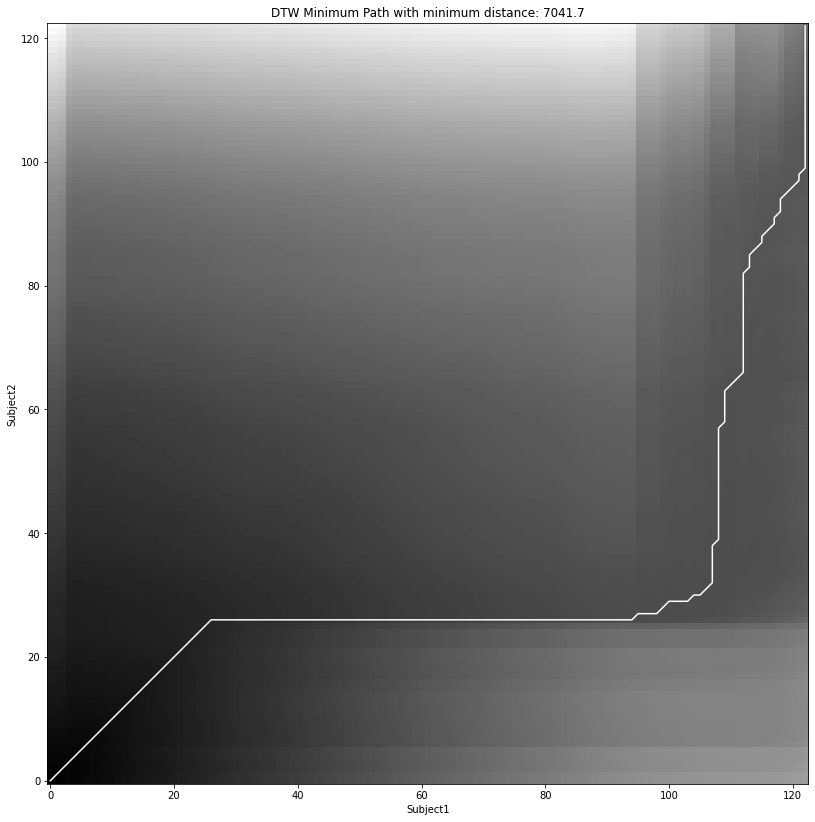

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['PM2.5'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

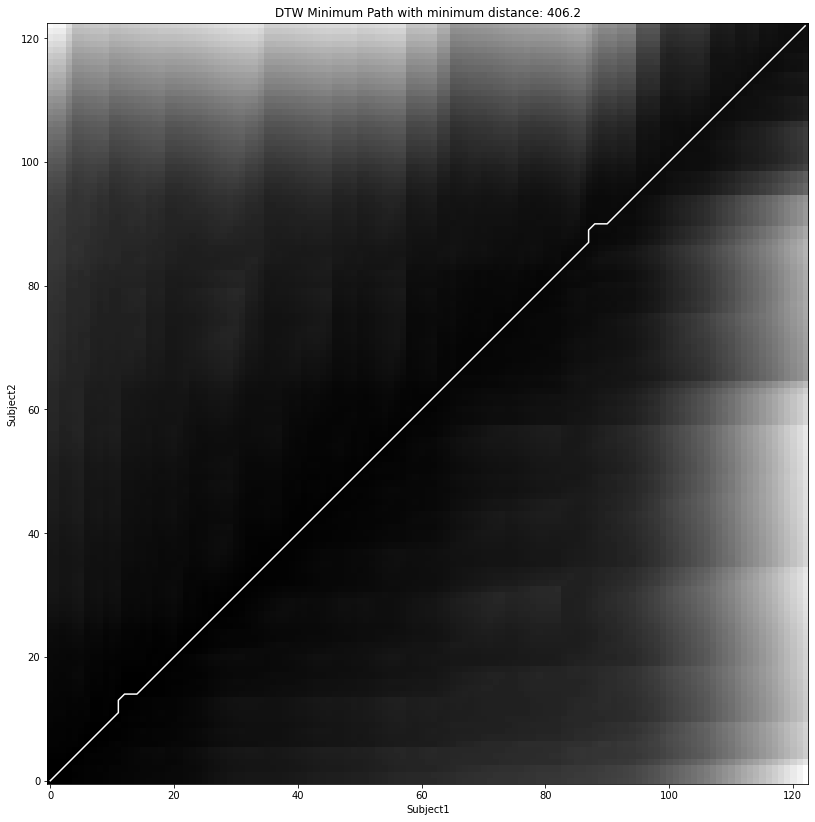

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NO2'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

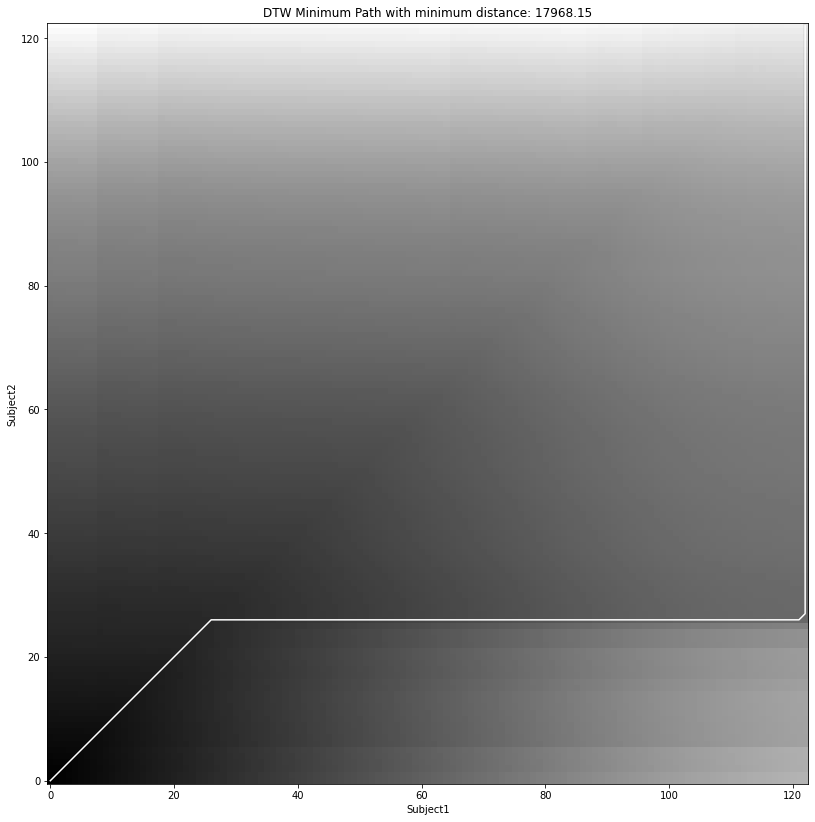

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NO'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

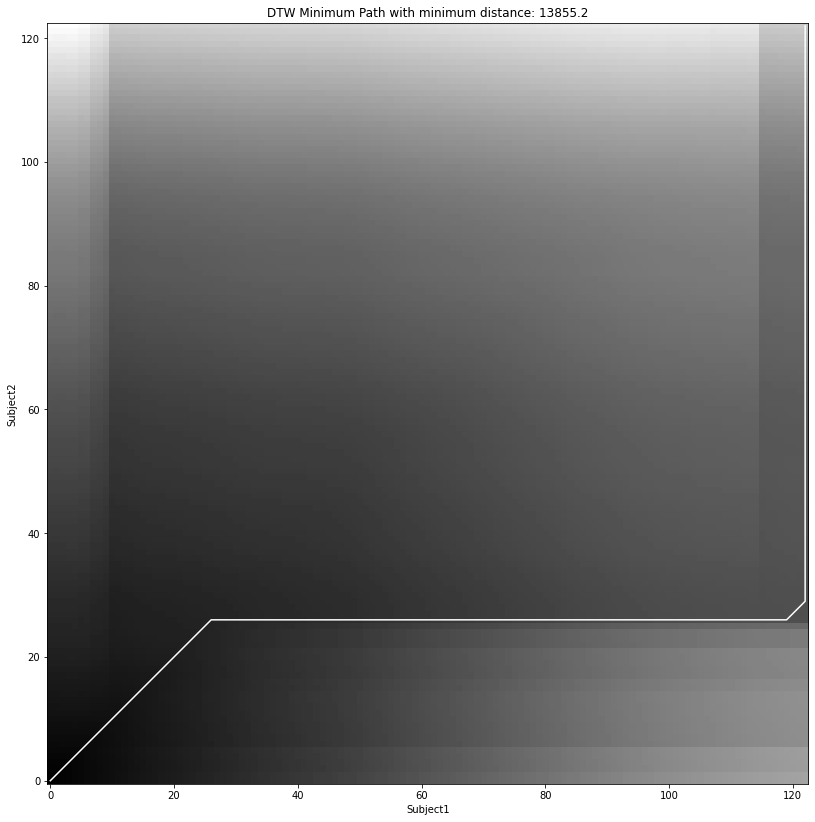

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NOx'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

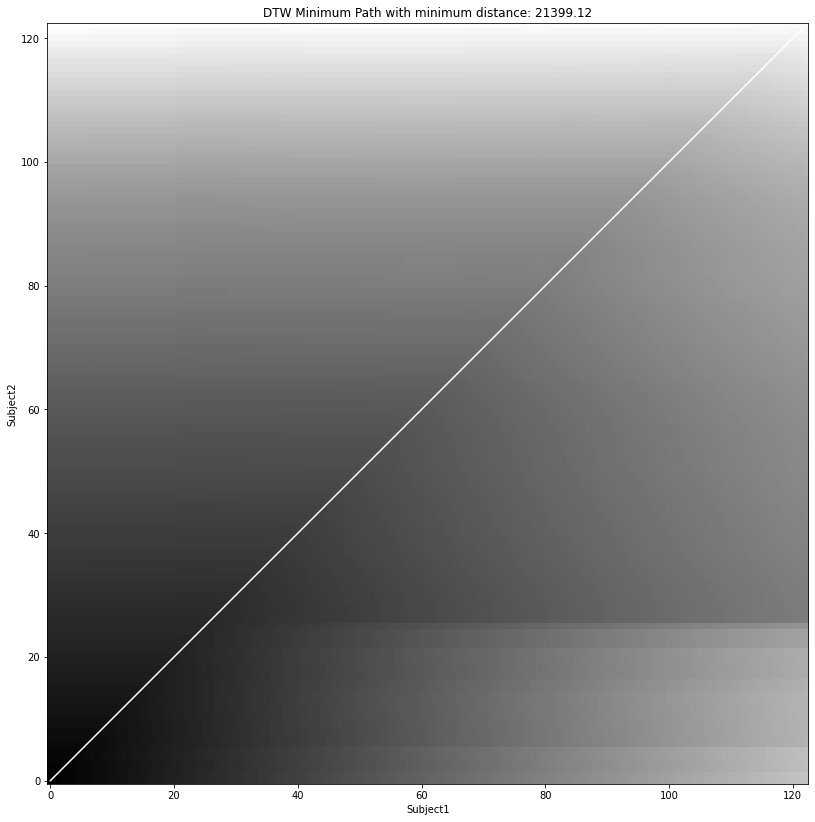

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['SO2'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

In [ ]:
bl_delhi=data_delhi[:"2020-03-24"]
al_delhi=data_delhi["2020-03-25":]

In [ ]:
bl_delhi

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  472.0  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  454.0  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  143.0  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  319.0  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  325.0  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-03-20   90.31  200.79  30.21  209.0  ...   1.24  19.71  48.23  209.0
2020-03-21   82.39  184.81  31.58  205.0  ...   1.18  18.55  43.19  205.0
2020-03-22   78.61  134.46  14.49  198.0  ...   0.92  16.63  47.67  198.0
2020-03-23   54.26  100.55  11.75  127.0  ...   0.78  15.17  46.48  127.0
2020-03-24   55.85  103.62  12.30  124.0  ...   0.81  15.81  38.23  124.0

[1910 rows x 10 columns]

In [ ]:
al_delhi

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-25  37.87   68.03  13.09   92.0  ...  0.68  11.49  32.11   92.0
2020-03-26  45.69   75.81   9.02   93.0  ...  0.58  12.82  30.59   93.0
2020-03-27  26.89   45.48   8.34   76.0  ...  0.53  11.04  27.38   76.0
2020-03-28  21.23   34.15   9.87   51.0  ...  0.54  10.28  25.06   51.0
2020-03-29  27.59   55.75   8.74   64.0  ...  0.52  10.39  35.75   64.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-27  39.80  155.94  10.88  112.0  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  196.0  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  233.0  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  114.0  ...  0.84  10.51  37.29  114.0
2020-07-01  54.01  128.66   6.33  101.0  ...  0.97  11.15  29.73  101.0

[99 rows x 10 columns]

In [ ]:
shift_al_delhi=al_delhi.copy()
shift_al_delhi["shifted_1"] = shift_al_delhi["AQI"].shift(periods=1)

In [ ]:
shift_al_delhi["diff_lag"] = shift_al_delhi["AQI"] - shift_al_delhi["shifted_1"]

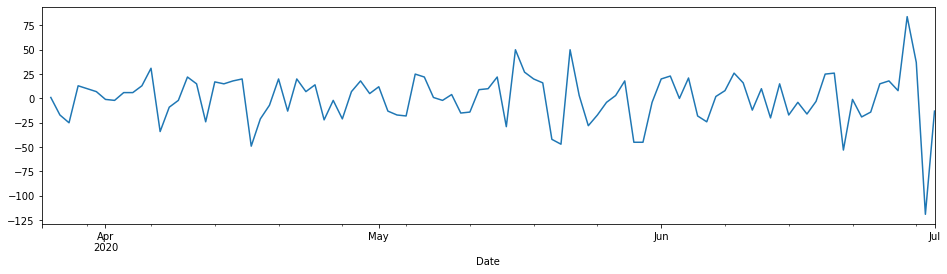

In [ ]:
shift_al_delhi["diff_lag"].plot(figsize=(16, 4));

In [ ]:
al_delhi

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-25  37.87   68.03  13.09   92.0  ...  0.68  11.49  32.11   92.0
2020-03-26  45.69   75.81   9.02   93.0  ...  0.58  12.82  30.59   93.0
2020-03-27  26.89   45.48   8.34   76.0  ...  0.53  11.04  27.38   76.0
2020-03-28  21.23   34.15   9.87   51.0  ...  0.54  10.28  25.06   51.0
2020-03-29  27.59   55.75   8.74   64.0  ...  0.52  10.39  35.75   64.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-27  39.80  155.94  10.88  112.0  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  196.0  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  233.0  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  114.0  ...  0.84  10.51  37.29  114.0
2020-07-01  54.01  128.66   6.33  101.0  ...  0.97  11.15  29.73  101.0

[99 rows x 10 columns]

In [ ]:
bl_delhi_week=data_week[:"2020-03-24"]

NameError: ignored

In [ ]:
bl_delhi_week["running_min"] = bl_delhi_week["AQI"].expanding().min()  # same as cummin()
bl_delhi_week["running_max"] = bl_delhi_week["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_delhi_week[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

In [ ]:
bl_delhi_week["running_min"]

In [ ]:
bl_delhi_week["running_max"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


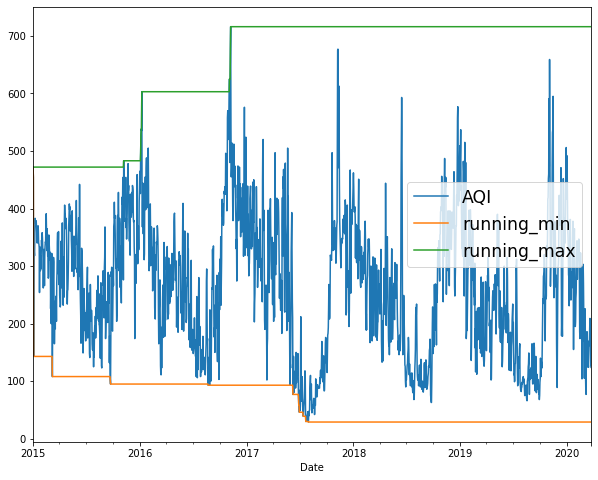

In [ ]:
bl_delhi["running_min"] = bl_delhi["AQI"].expanding().min()  # same as cummin()
bl_delhi["running_max"] = bl_delhi["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_delhi[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");
plt.savefig(fname="bl_rm.jpg", dpi=600)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


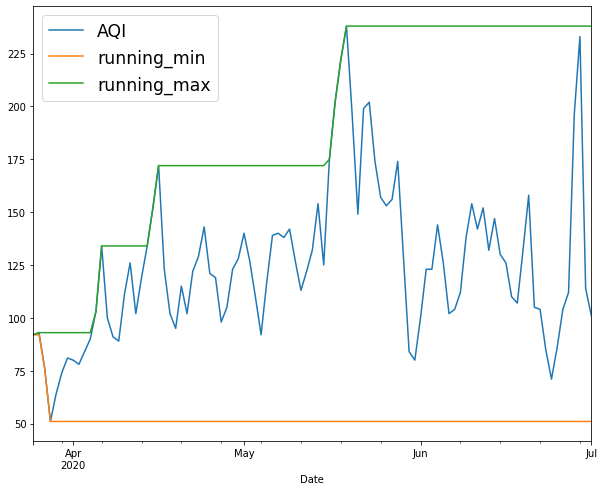

In [ ]:
al_delhi["running_min"] = al_delhi["AQI"].expanding().min()  # same as cummin()
al_delhi["running_max"] = al_delhi["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

al_delhi[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");
plt.savefig(fname="al_rm.jpg", dpi=600)

In [ ]:
al_delhi["running_min"]  # same as cummin()


Date
2020-03-25    92.0
2020-03-26    92.0
2020-03-27    76.0
2020-03-28    51.0
2020-03-29    51.0
              ... 
2020-06-27    51.0
2020-06-28    51.0
2020-06-29    51.0
2020-06-30    51.0
2020-07-01    51.0
Name: running_min, Length: 99, dtype: float64

In [ ]:

al_delhi["running_max"] 

Date
2020-03-25     92.0
2020-03-26     93.0
2020-03-27     93.0
2020-03-28     93.0
2020-03-29     93.0
              ...  
2020-06-27    238.0
2020-06-28    238.0
2020-06-29    238.0
2020-06-30    238.0
2020-07-01    238.0
Name: running_max, Length: 99, dtype: float64

In [ ]:
bl_delhi["running_min"]  # same as cummin()

Date
2015-01-01    472.0
2015-01-02    454.0
2015-01-03    143.0
2015-01-04    143.0
2015-01-05    143.0
              ...  
2020-03-20     29.0
2020-03-21     29.0
2020-03-22     29.0
2020-03-23     29.0
2020-03-24     29.0
Name: running_min, Length: 1910, dtype: float64

In [ ]:
bl_delhi["running_max"]  # same as cummin()

Date
2015-01-01    472.0
2015-01-02    472.0
2015-01-03    472.0
2015-01-04    472.0
2015-01-05    472.0
              ...  
2020-03-20    716.0
2020-03-21    716.0
2020-03-22    716.0
2020-03-23    716.0
2020-03-24    716.0
Name: running_max, Length: 1910, dtype: float64

In [ ]:
data1=al_delhi["AQI"].resample("7D").agg(["mean", "median", "std"])

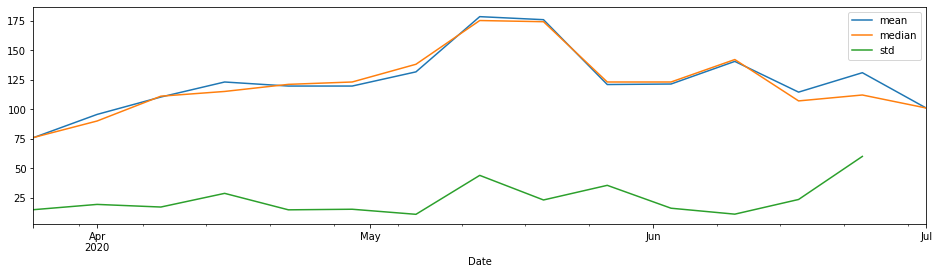

In [ ]:
data1.plot(figsize=(16, 4));

In [ ]:
bl_week=data_month=bl_delhi.resample("7D").mean()
al_week=data_month=al_delhi.resample("7D").mean()


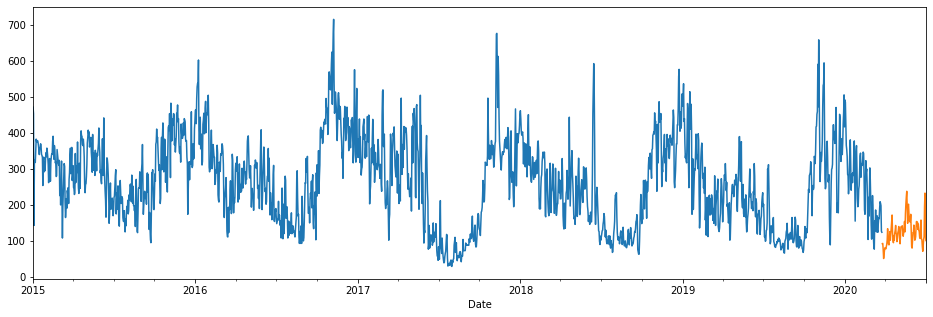

In [ ]:
bl_delhi["AQI"].plot(figsize=(16, 5))
al_delhi["AQI"].plot()

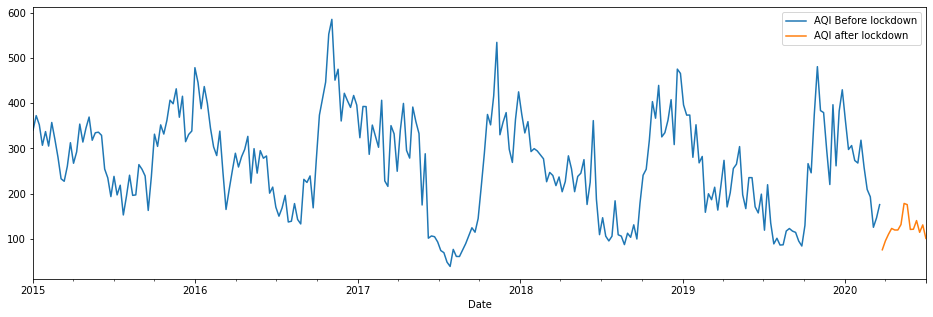

In [ ]:
bl_week["AQI"].plot(figsize=(16, 5), label="AQI Before lockdown")
al_week["AQI"].plot(label="AQI after lockdown")
plt.legend()
plt.savefig(fname="lock_aqi.jpg", dpi=600)

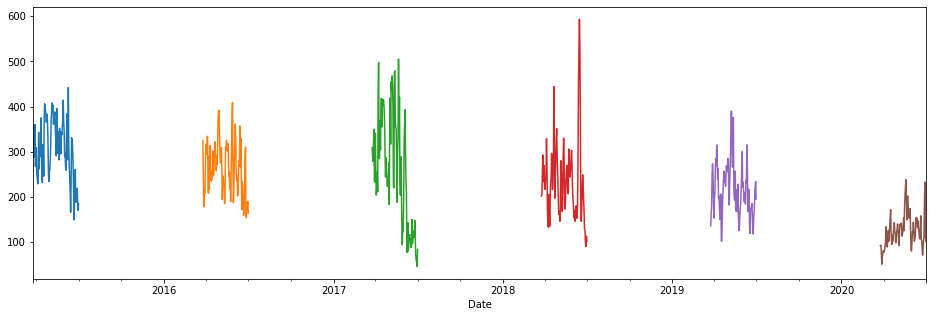

In [ ]:
bl_delhi["2015-03-25":"2015-07-01"]["AQI"].plot(figsize=(16, 5))
bl_delhi["2016-03-25":"2016-07-01"]["AQI"].plot()
bl_delhi["2017-03-25":"2017-07-01"]["AQI"].plot()
bl_delhi["2018-03-25":"2018-07-01"]["AQI"].plot()
bl_delhi["2019-03-25":"2019-07-01"]["AQI"].plot()

al_delhi["AQI"].plot()

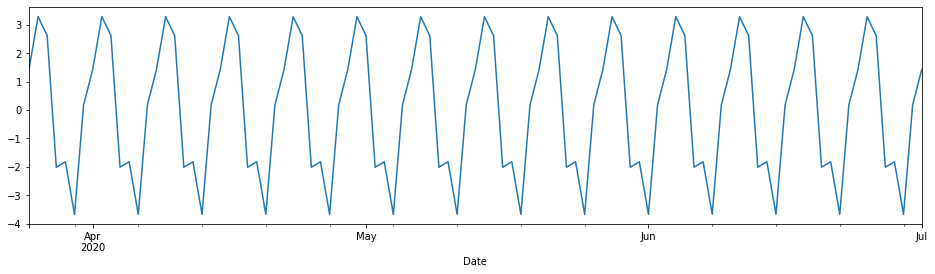

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(al_delhi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

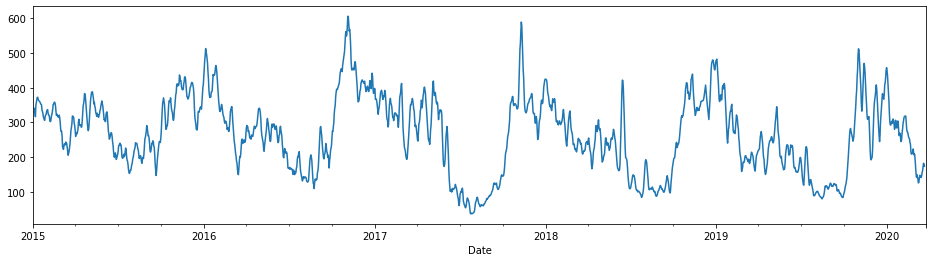

In [ ]:
decomposition = sm.tsa.seasonal_decompose(bl_delhi["AQI"].dropna())

decomposition.trend.plot();

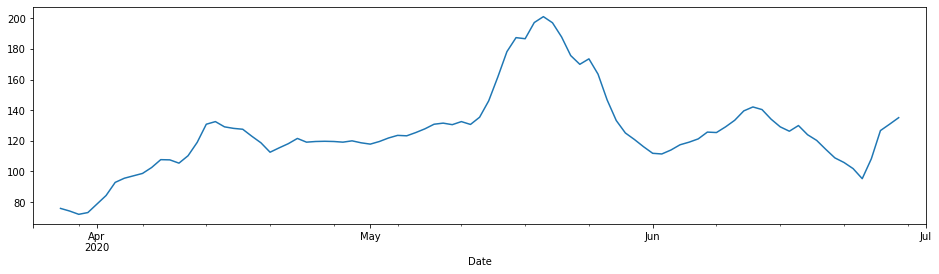

In [ ]:
decomposition = sm.tsa.seasonal_decompose(al_delhi["AQI"].dropna())

decomposition.trend.plot();

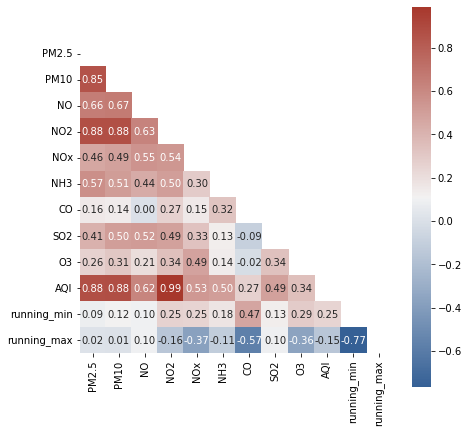

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = bl_delhi.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

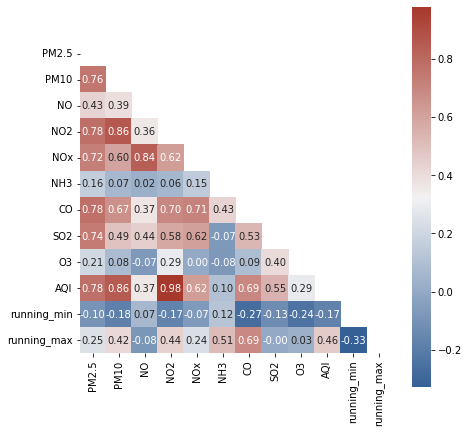

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = al_delhi.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


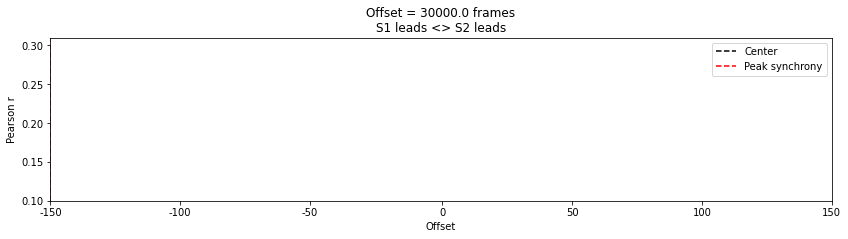

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['NO2']
d2 = al_delhi['AQI']
seconds = 1000
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


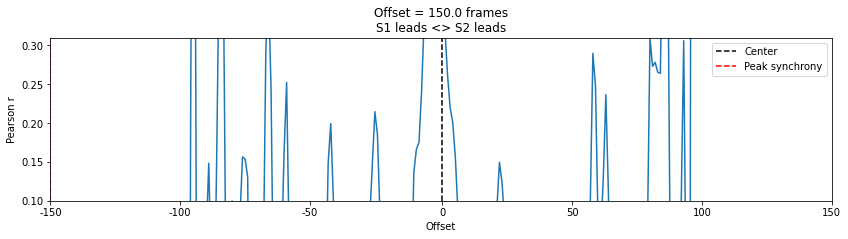

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['PM2.5']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


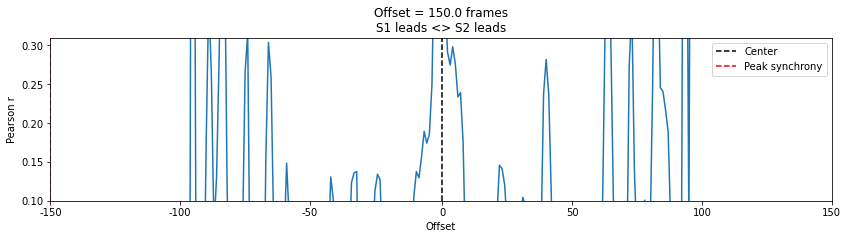

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['PM10']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


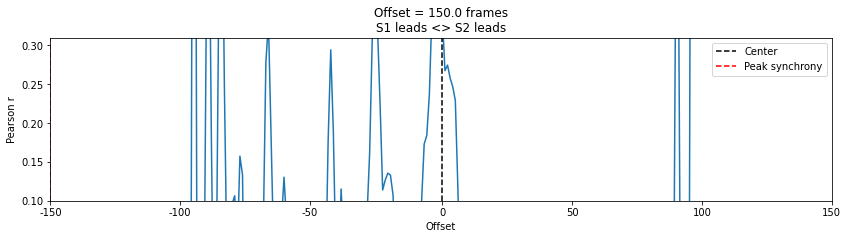

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['SO2']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


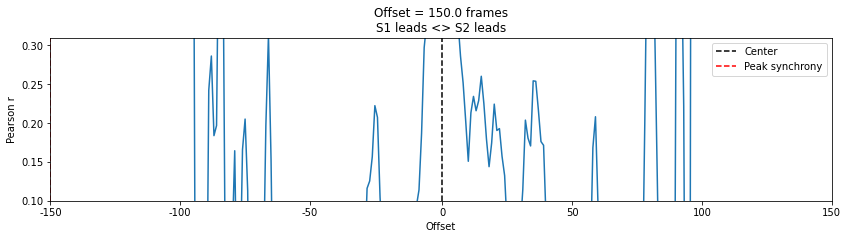

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['CO']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

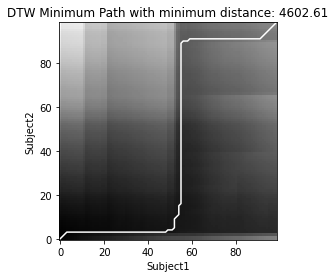

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['PM2.5'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

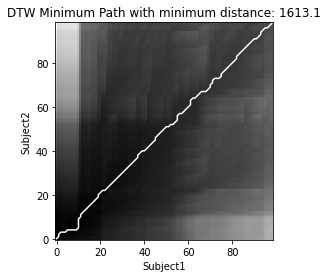

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['PM10'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

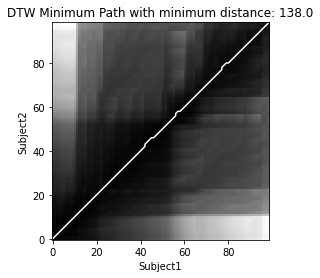

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

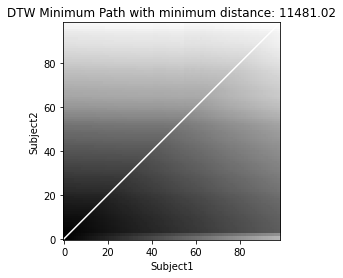

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

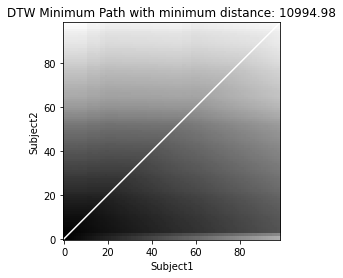

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['SO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

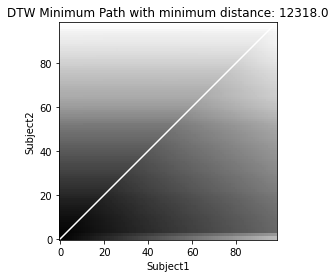

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['CO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

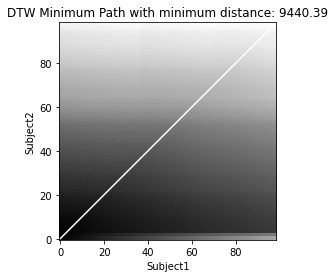

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NH3'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

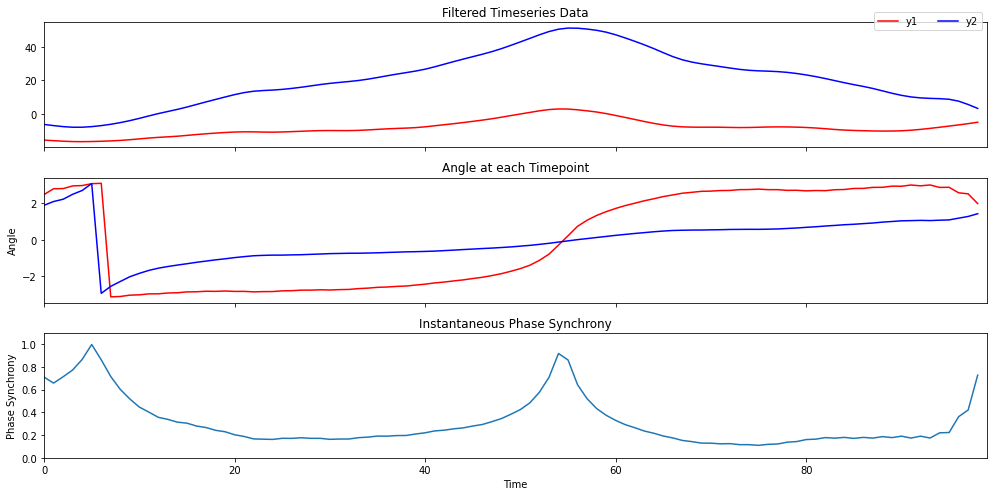

In [ ]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['PM2.5'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

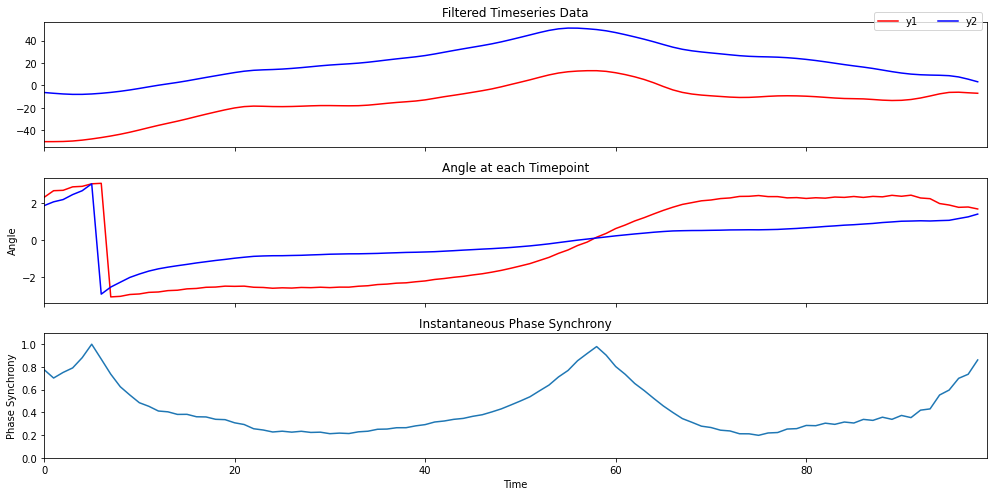

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['PM10'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

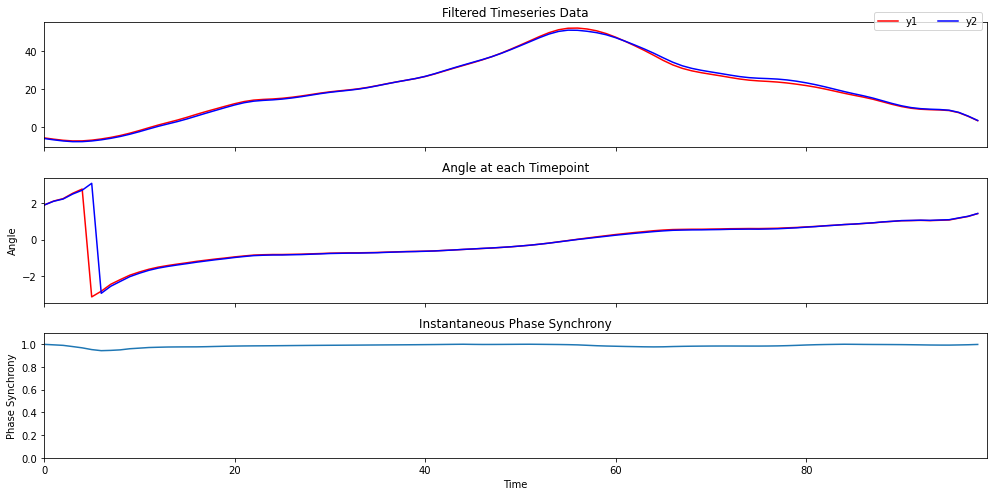

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

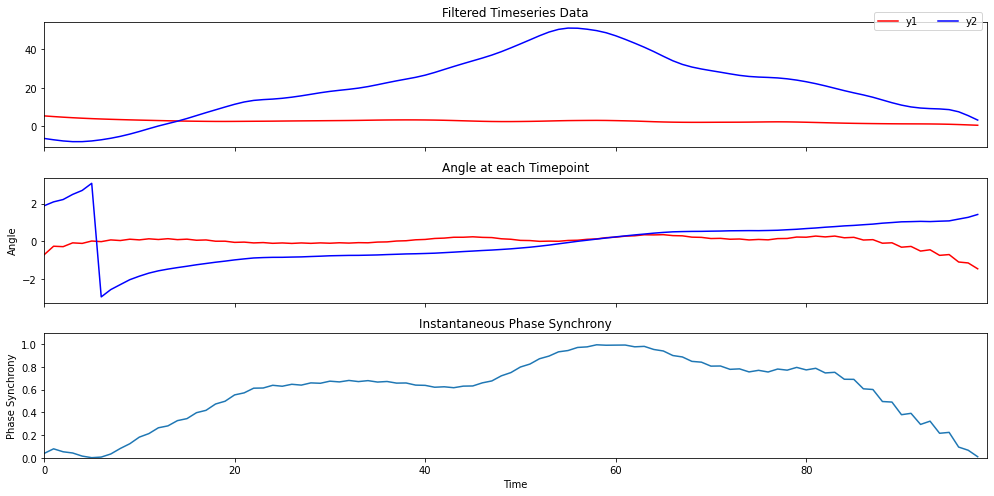

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

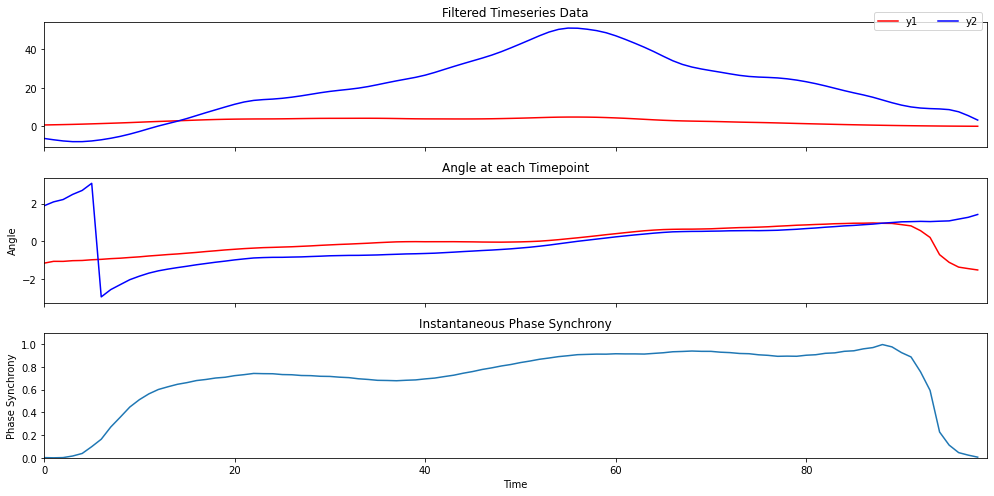

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['SO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

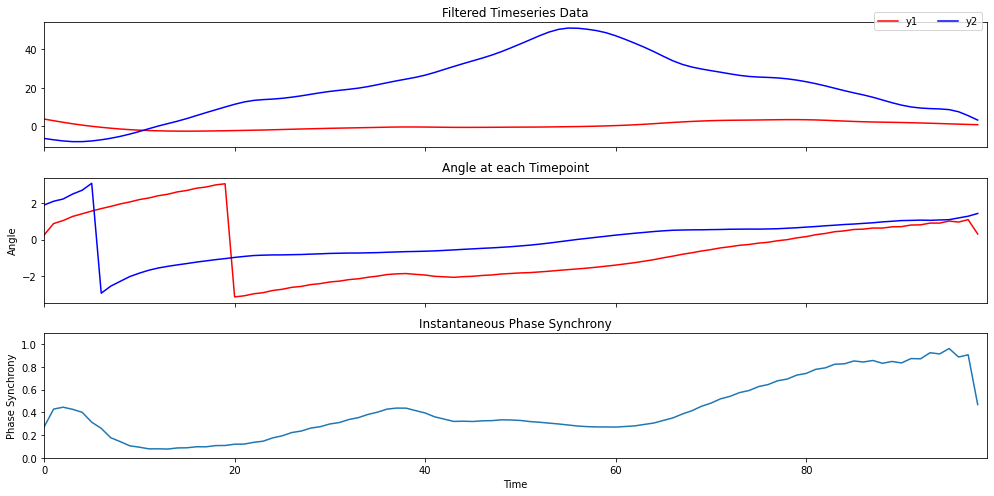

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NH3'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

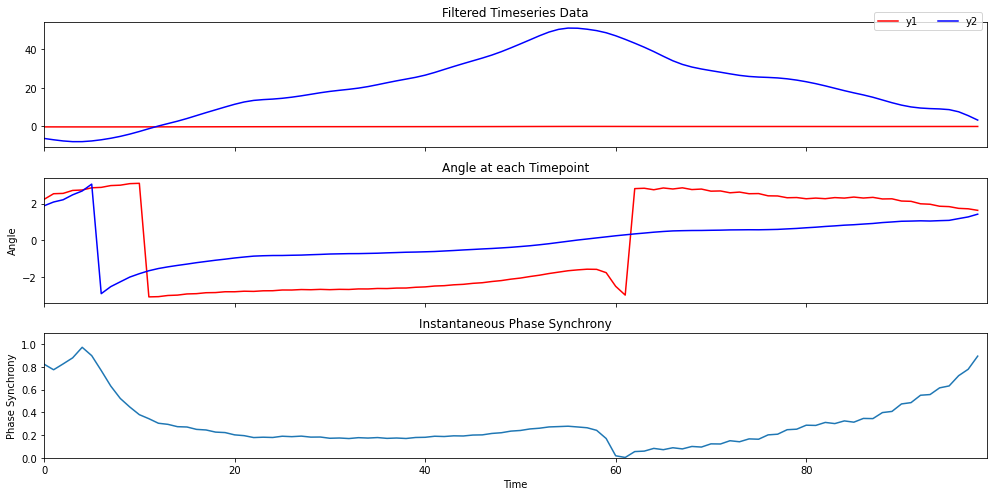

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['CO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [ ]:
# # Windowed time lagged cross correlation
# seconds = 5
# fps = 30
# no_splits = 20
# samples_per_split = al_delhi.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = al_delhi['PM2.5'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     d2 = al_delhi['AQI'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = al_delhi['PM2.5'].iloc[t_start:t_end]
#     d2 = al_delhi['AQI'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_delhi['AQI'])

In [ ]:
data_week=data_delhi.resample("7D").mean()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_week['AQI'])

ADF Test Statistic : -4.835566413537756
p-value : 4.647667864810488e-05
#Lags Used : 9
Number of Observations : 277
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_week['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                  286
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1571.846
Method:                       css-mle   S.D. of innovations             58.960
Date:                Sat, 18 Sep 2021   AIC                           3151.693
Time:                        10:06:28   BIC                           3166.316
Sample:                    01-08-2015   HQIC                          3157.554
                         - 06-25-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7643      2.458     -0.311      0.756      -5.582       4.053
ar.L1.D.AQI    -0.0097      0.150     -0.065      0.948      -0.303       0.284
ma.L1.D.AQI    -0.2892      0.138     -2.096      0.037      -0.560      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -103.2509           +0.0000j          103.2509            0.5000
MA.1            3.4576           +0.0000j            3.4576            0.0000
-----------------------------------------------------------------------------
"""

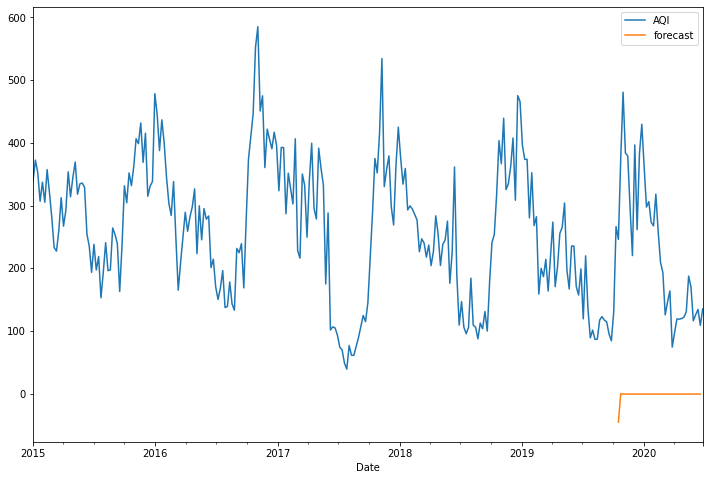

In [ ]:
data_week['forecast']=model_fit.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

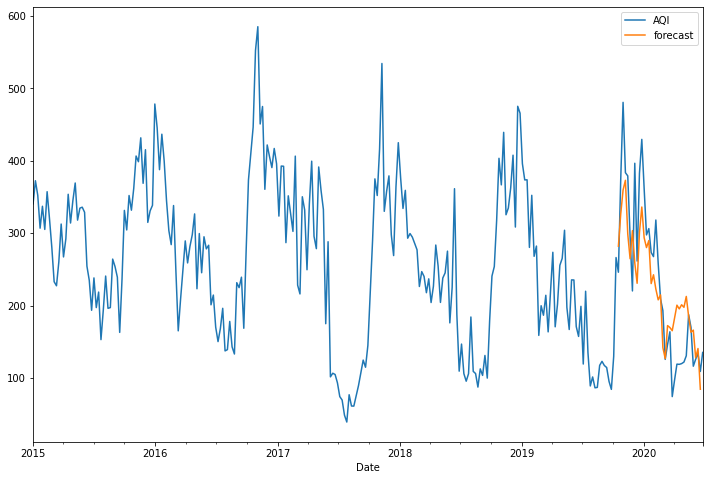

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_week['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,52))
results=model.fit()
data_week['forecast']=results.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


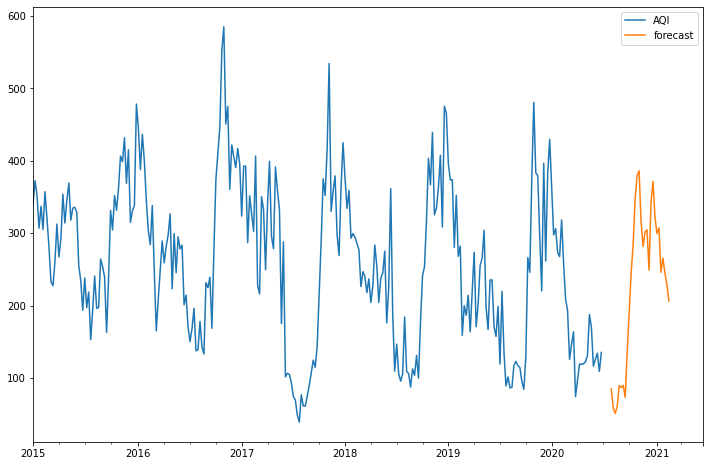

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_week.index[-1]+ DateOffset(weeks=x)for x in range(0,52)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_week.columns)

future_datest_df.tail()

future_df=pd.concat([data_week,future_datest_df])

future_df['forecast'] = results.predict(start = 291, end = 320, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
data_month=data_delhi.resample("M").mean().diff(periods=1).dropna()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_month['AQI'])

ADF Test Statistic : -6.774619853674921
p-value : 2.5896237352690184e-09
#Lags Used : 10
Number of Observations : 55
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_month['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

ValueError: ignored

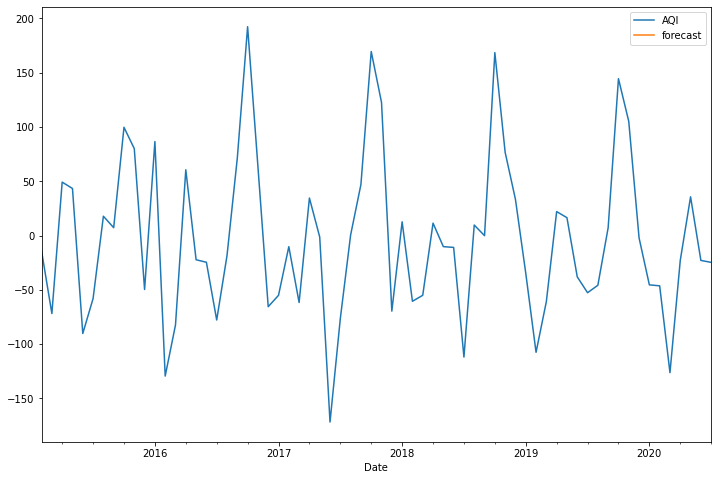

In [ ]:
data_month['forecast']=model_fit.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


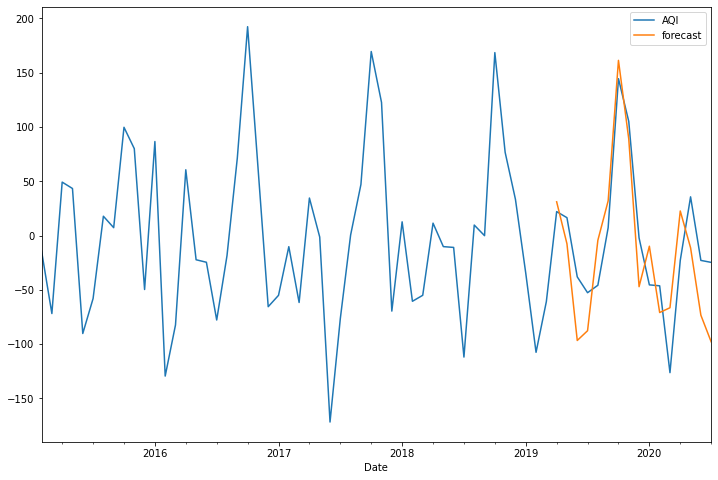

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_month['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data_month['forecast']=results.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
data_month

PM2.5       PM10         NO  ...         O3         AQI   forecast
Date                                         ...                                  
2015-02-28 -21.770288 -42.031647   2.895276  ...   4.960933  -14.361751        NaN
2015-03-31 -73.582293 -99.895127 -14.277857  ...  -2.091256  -71.864055        NaN
2015-04-30  11.224269  52.946817   3.500667  ...  29.433613   49.202151        NaN
2015-05-31   5.547022  83.059312  12.323204  ...  10.889613   43.313978        NaN
2015-06-30 -11.332355 -85.940978 -10.862538  ...  -1.978946  -90.247312        NaN
...               ...        ...        ...  ...        ...         ...        ...
2020-03-31 -63.977686 -97.686485 -17.106874  ...   0.402113 -126.299221 -66.523166
2020-04-30 -12.566452 -17.311366 -12.239677  ...   8.326312  -22.838710  22.613989
2020-05-31  10.508710  32.784591   0.060323  ...  10.582398   35.645161 -11.259846
2020-06-30  -8.754043 -16.452925  -1.311656  ... -17.152065  -22.911828 -73.367726
2020-07-31   7.315333   7.450667  -2.128667  ...  -9.886000  -24.733333 -97.903879

[66 rows x 11 columns]

In [ ]:
test_aqi=data_month.dropna()

In [ ]:
test_aqi

PM2.5        PM10         NO  ...         O3         AQI    forecast
Date                                          ...                                   
2019-04-30  -1.839968   47.205849  -0.595323  ...  11.868086   22.045161   31.067921
2019-05-31   7.437065   17.677054   2.937258  ...   0.872237   16.438710   -7.621577
2019-06-30 -25.907731  -38.271720 -12.153591  ...   2.479430  -38.072043  -96.666522
2019-07-31 -17.106785  -67.719892  -5.311892  ... -22.017817  -52.669892  -87.690732
2019-08-31 -12.616774  -58.870000   3.306452  ...  -5.846129  -45.806452   -4.400890
2019-09-30   6.015892   14.898559  -5.540226  ...   2.948613    7.243011   31.958322
2019-10-31  83.524430  141.515957  27.674419  ...  12.223968  144.466667  161.346693
2019-11-30  81.736570   76.066376   3.512914  ...  -8.544301  105.100000   88.933806
2019-12-31  -0.152054   -5.797989   6.351280  ...  -4.414409   -2.196774  -47.111913
2020-01-31 -48.129032  -70.116774  -1.877742  ...  -3.527742  -45.451613   -9.847503
2020-02-29 -35.628443  -18.647386  -8.857319  ...  11.152725  -46.313682  -70.920890
2020-03-31 -63.977686  -97.686485 -17.106874  ...   0.402113 -126.299221  -66.523166
2020-04-30 -12.566452  -17.311366 -12.239677  ...   8.326312  -22.838710   22.613989
2020-05-31  10.508710   32.784591   0.060323  ...  10.582398   35.645161  -11.259846
2020-06-30  -8.754043  -16.452925  -1.311656  ... -17.152065  -22.911828  -73.367726
2020-07-31   7.315333    7.450667  -2.128667  ...  -9.886000  -24.733333  -97.903879

[16 rows x 11 columns]

In [ ]:
test_aqi

PM2.5        PM10         NO  ...         O3         AQI    forecast
Date                                          ...                                   
2019-04-30  -1.839968   47.205849  -0.595323  ...  11.868086   22.045161   31.067921
2019-05-31   7.437065   17.677054   2.937258  ...   0.872237   16.438710   -7.621577
2019-06-30 -25.907731  -38.271720 -12.153591  ...   2.479430  -38.072043  -96.666522
2019-07-31 -17.106785  -67.719892  -5.311892  ... -22.017817  -52.669892  -87.690732
2019-08-31 -12.616774  -58.870000   3.306452  ...  -5.846129  -45.806452   -4.400890
2019-09-30   6.015892   14.898559  -5.540226  ...   2.948613    7.243011   31.958322
2019-10-31  83.524430  141.515957  27.674419  ...  12.223968  144.466667  161.346693
2019-11-30  81.736570   76.066376   3.512914  ...  -8.544301  105.100000   88.933806
2019-12-31  -0.152054   -5.797989   6.351280  ...  -4.414409   -2.196774  -47.111913
2020-01-31 -48.129032  -70.116774  -1.877742  ...  -3.527742  -45.451613   -9.847503
2020-02-29 -35.628443  -18.647386  -8.857319  ...  11.152725  -46.313682  -70.920890
2020-03-31 -63.977686  -97.686485 -17.106874  ...   0.402113 -126.299221  -66.523166
2020-04-30 -12.566452  -17.311366 -12.239677  ...   8.326312  -22.838710   22.613989
2020-05-31  10.508710   32.784591   0.060323  ...  10.582398   35.645161  -11.259846
2020-06-30  -8.754043  -16.452925  -1.311656  ... -17.152065  -22.911828  -73.367726
2020-07-31   7.315333    7.450667  -2.128667  ...  -9.886000  -24.733333  -97.903879

[16 rows x 11 columns]

In [ ]:
data_month_og=data_delhi.resample("M").mean()

In [ ]:
data_month_og["AQI"][-1:]

Date
2020-07-31    101.0
Freq: M, Name: AQI, dtype: float64

In [ ]:
future_sar=list()
for i in range(8, 13):
	date = '2020-%02d' % i
	future_sar.append([date])
for i in range(1, 9):
	date = '2021-%02d' % i
	future_sar.append([date])
future_df_sar=pd.DataFrame(future_sar)
future_df_sar.columns = ['Date']
future_df_sar['Date']= pd.to_datetime(future_df_sar['Date'])

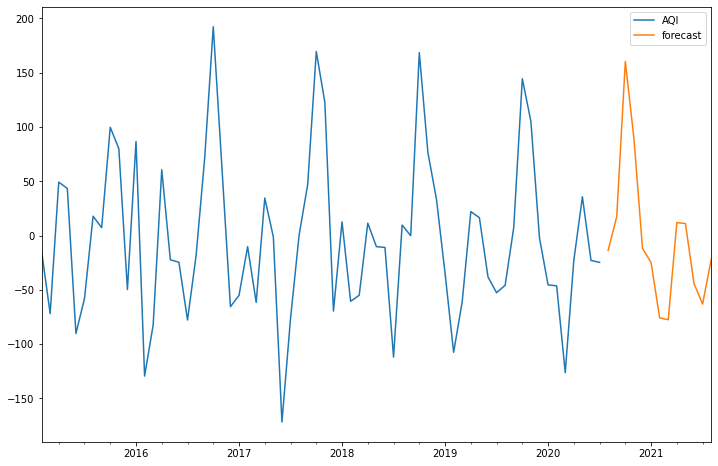

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_month.index[-1]+ DateOffset(months=x)for x in range(0,14)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

future_datest_df.tail()

future_df=pd.concat([data_month,future_datest_df])

future_df['forecast'] = results.predict(start = 66, end = 79, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))
plt.savefig(fname="sarimax.jpg", dpi=600)

In [ ]:
future_df_copy=future_df["2020-08-01":]

In [ ]:
future_df_copy

PM2.5  PM10  NO  NO2  NOx  NH3  CO  SO2  O3  AQI    forecast
2020-08-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -13.673881
2020-09-30    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN   17.574157
2020-10-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  160.295725
2020-11-30    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN   89.497130
2020-12-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -11.770128
2021-01-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -24.856479
2021-02-28    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -75.811004
2021-03-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -77.549700
2021-04-30    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN   11.947053
2021-05-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN   11.052899
2021-06-30    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -44.256373
2021-07-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -63.152796
2021-08-31    NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN  NaN  -22.116423

In [ ]:
future_df_copy["forecast"][0]

-13.673880588140188

In [ ]:
future_df_copy.shape[0]

13

In [ ]:
first_aqi=101
real_aqi=list()
for i in range(future_df_copy.shape[0]):
  real_aqi.append(first_aqi+future_df_copy["forecast"][i])
  first_aqi=first_aqi+future_df_copy["forecast"][i]

In [ ]:
future_df_copy["Actual"]=real_aqi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
future_df_copy

PM2.5  PM10  NO  NO2  NOx  ...  SO2  O3  AQI    forecast      Actual
2020-08-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -13.673881   87.326119
2020-09-30    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN   17.574157  104.900277
2020-10-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  160.295725  265.196001
2020-11-30    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN   89.497130  354.693131
2020-12-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -11.770128  342.923003
2021-01-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -24.856479  318.066524
2021-02-28    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -75.811004  242.255520
2021-03-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -77.549700  164.705820
2021-04-30    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN   11.947053  176.652873
2021-05-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN   11.052899  187.705772
2021-06-30    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -44.256373  143.449399
2021-07-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -63.152796   80.296603
2021-08-31    NaN   NaN NaN  NaN  NaN  ...  NaN NaN  NaN  -22.116423   58.180180

[13 rows x 12 columns]

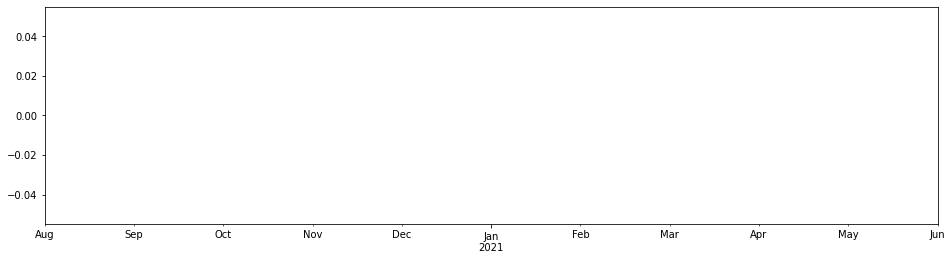

In [ ]:
future_df_copy["AQI"].plot()

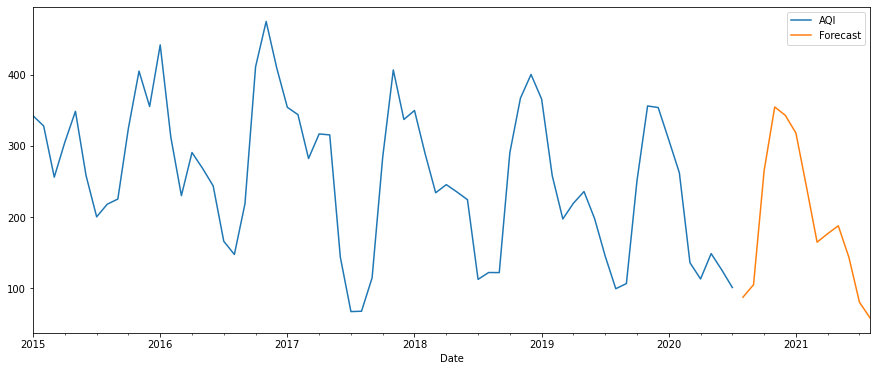

In [ ]:
data_month_og["AQI"].plot(figsize=(15,6), label="AQI")
future_df_copy["Actual"].plot(label="Forecast")
plt.legend()
plt.savefig(fname="sarimax.jpg", dpi=600)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data_month['AQI'][(data_month['forecast'].dropna().index)].values, data_month['forecast'].dropna().values)
mae

37.92200750855426

In [ ]:
!pip install fbprophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


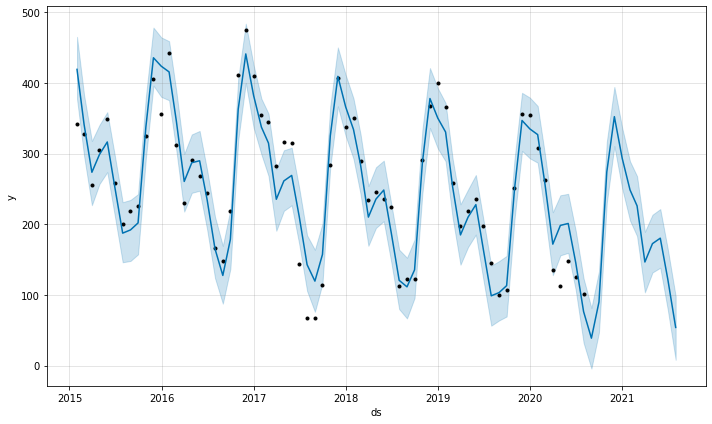

In [ ]:
from fbprophet import Prophet

# instantiate the model and fit the timeseries
prophet = Prophet()
prophet.fit(data_month_prophet)

# create a future data frame 
future = prophet.make_future_dataframe(periods=12, freq="M")
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
plt.savefig(fname="prophet.jpg", dpi=600)

In [ ]:
comp_forecast=forecast[:67]

In [ ]:
comp_forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0  2015-01-31  330.312369  ...                         0.0  419.050662
1  2015-02-28  328.614365  ...                         0.0  341.245639
2  2015-03-31  326.734432  ...                         0.0  273.508666
3  2015-04-30  324.915142  ...                         0.0  298.621052
4  2015-05-31  323.035209  ...                         0.0  316.374553
..        ...         ...  ...                         ...         ...
62 2020-03-31  215.856463  ...                         0.0  171.843716
63 2020-04-30  214.032535  ...                         0.0  198.356879
64 2020-05-31  212.147810  ...                         0.0  201.089103
65 2020-06-30  210.323882  ...                         0.0  145.446652
66 2020-07-31  208.439156  ...                         0.0   76.447613

[67 rows x 16 columns]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data_month_og['AQI'].values, comp_forecast['yhat'].values)
mae

26.283984575850358

In [ ]:
forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0  2015-01-31  330.312369  ...                         0.0  419.050662
1  2015-02-28  328.614365  ...                         0.0  341.245639
2  2015-03-31  326.734432  ...                         0.0  273.508666
3  2015-04-30  324.915142  ...                         0.0  298.621052
4  2015-05-31  323.035209  ...                         0.0  316.374553
..        ...         ...  ...                         ...         ...
74 2021-03-31  193.665341  ...                         0.0  146.585892
75 2021-04-30  191.841413  ...                         0.0  172.546856
76 2021-05-31  189.956687  ...                         0.0  180.294232
77 2021-06-30  188.132760  ...                         0.0  121.827677
78 2021-07-31  186.248034  ...                         0.0   54.057436

[79 rows x 16 columns]

In [ ]:
forecast[:67]

ds       trend  ...  multiplicative_terms_upper        yhat
0  2015-01-31  330.312369  ...                         0.0  419.050662
1  2015-02-28  328.614365  ...                         0.0  341.245639
2  2015-03-31  326.734432  ...                         0.0  273.508666
3  2015-04-30  324.915142  ...                         0.0  298.621052
4  2015-05-31  323.035209  ...                         0.0  316.374553
..        ...         ...  ...                         ...         ...
62 2020-03-31  215.856463  ...                         0.0  171.843716
63 2020-04-30  214.032535  ...                         0.0  198.356879
64 2020-05-31  212.147810  ...                         0.0  201.089103
65 2020-06-30  210.323882  ...                         0.0  145.446652
66 2020-07-31  208.439156  ...                         0.0   76.447613

[67 rows x 16 columns]

In [ ]:
data_month_og

PM2.5        PM10         NO  ...         O3         AQI  forecast
Date                                           ...                                 
2015-01-31  175.690645  276.971290  26.392581  ...  25.868710  342.290323       NaN
2015-02-28  153.920357  234.939643  29.287857  ...  30.829643  327.928571       NaN
2015-03-31   80.338065  135.044516  15.010000  ...  28.738387  256.064516       NaN
2015-04-30   91.562333  187.991333  18.510667  ...  58.172000  305.266667       NaN
2015-05-31   97.109355  271.050645  30.833871  ...  69.061613  348.580645       NaN
...                ...         ...        ...  ...        ...         ...       ...
2020-03-31   57.506452  122.189032  21.949677  ...  37.859355  135.838710 -0.127713
2020-04-30   44.940000  104.877667   9.710000  ...  46.185667  113.000000 -0.127713
2020-05-31   55.448710  137.662258   9.770323  ...  56.768065  148.645161 -0.127713
2020-06-30   46.694667  121.209333   8.458667  ...  39.616000  125.733333 -0.127713
2020-07-31   54.010000  128.660000   6.330000  ...  29.730000  101.000000 -0.127713

[67 rows x 11 columns]

In [ ]:
data_month_og

PM2.5        PM10         NO  ...         O3         AQI  forecast
Date                                           ...                                 
2015-01-31  175.690645  276.971290  26.392581  ...  25.868710  342.290323       NaN
2015-02-28  153.920357  234.939643  29.287857  ...  30.829643  327.928571       NaN
2015-03-31   80.338065  135.044516  15.010000  ...  28.738387  256.064516       NaN
2015-04-30   91.562333  187.991333  18.510667  ...  58.172000  305.266667       NaN
2015-05-31   97.109355  271.050645  30.833871  ...  69.061613  348.580645       NaN
...                ...         ...        ...  ...        ...         ...       ...
2020-03-31   57.506452  122.189032  21.949677  ...  37.859355  135.838710 -0.127713
2020-04-30   44.940000  104.877667   9.710000  ...  46.185667  113.000000 -0.127713
2020-05-31   55.448710  137.662258   9.770323  ...  56.768065  148.645161 -0.127713
2020-06-30   46.694667  121.209333   8.458667  ...  39.616000  125.733333 -0.127713
2020-07-31   54.010000  128.660000   6.330000  ...  29.730000  101.000000 -0.127713

[67 rows x 11 columns]

In [ ]:
data_month

PM2.5       PM10         NO  ...         O3         AQI   forecast
Date                                         ...                                  
2015-02-28 -21.770288 -42.031647   2.895276  ...   4.960933  -14.361751        NaN
2015-03-31 -73.582293 -99.895127 -14.277857  ...  -2.091256  -71.864055        NaN
2015-04-30  11.224269  52.946817   3.500667  ...  29.433613   49.202151        NaN
2015-05-31   5.547022  83.059312  12.323204  ...  10.889613   43.313978        NaN
2015-06-30 -11.332355 -85.940978 -10.862538  ...  -1.978946  -90.247312        NaN
...               ...        ...        ...  ...        ...         ...        ...
2020-03-31 -63.977686 -97.686485 -17.106874  ...   0.402113 -126.299221 -66.523166
2020-04-30 -12.566452 -17.311366 -12.239677  ...   8.326312  -22.838710  22.613989
2020-05-31  10.508710  32.784591   0.060323  ...  10.582398   35.645161 -11.259846
2020-06-30  -8.754043 -16.452925  -1.311656  ... -17.152065  -22.911828 -73.367726
2020-07-31   7.315333   7.450667  -2.128667  ...  -9.886000  -24.733333 -97.903879

[66 rows x 11 columns]

In [ ]:
data_month_prophet=pd.DataFrame()
data_month_prophet['ds']=pd.to_datetime(data_month_og.index)
data_month_prophet['y']=data_month_og['AQI'].values
data_month_prophet

ds           y
0  2015-01-31  342.290323
1  2015-02-28  327.928571
2  2015-03-31  256.064516
3  2015-04-30  305.266667
4  2015-05-31  348.580645
..        ...         ...
62 2020-03-31  135.838710
63 2020-04-30  113.000000
64 2020-05-31  148.645161
65 2020-06-30  125.733333
66 2020-07-31  101.000000

[67 rows x 2 columns]

In [ ]:
import fbprophet
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(data_month_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=pd.DataFrame()
future['ds']=pd.to_datetime(data_month.index)
future

ds
0  2015-02-28
1  2015-03-31
2  2015-04-30
3  2015-05-31
4  2015-06-30
..        ...
61 2020-03-31
62 2020-04-30
63 2020-05-31
64 2020-06-30
65 2020-07-31

[66 rows x 1 columns]

In [ ]:
predictions=model.predict(future)
predictions

ds       trend  ...  multiplicative_terms_upper        yhat
0  2015-02-28  328.614365  ...                         0.0  341.245639
1  2015-03-31  326.734432  ...                         0.0  273.508666
2  2015-04-30  324.915142  ...                         0.0  298.621052
3  2015-05-31  323.035209  ...                         0.0  316.374553
4  2015-06-30  321.215919  ...                         0.0  252.295336
..        ...         ...  ...                         ...         ...
61 2020-03-31  215.856463  ...                         0.0  171.843716
62 2020-04-30  214.032535  ...                         0.0  198.356879
63 2020-05-31  212.147810  ...                         0.0  201.089103
64 2020-06-30  210.323882  ...                         0.0  145.446652
65 2020-07-31  208.439156  ...                         0.0   76.447613

[66 rows x 16 columns]

In [ ]:
future_2=list()
for i in range(8, 13):
	date = '2020-%02d' % i
	future_2.append([date])
for i in range(1, 9):
	date = '2021-%02d' % i
	future_2.append([date])
future_df_prop=pd.DataFrame(future_2)
future_df_prop.columns = ['ds']
future_df_prop['ds']= pd.to_datetime(future_df_prop['ds'])

In [ ]:
future_df_prop

ds
0  2020-08-01
1  2020-09-01
2  2020-10-01
3  2020-11-01
4  2020-12-01
5  2021-01-01
6  2021-02-01
7  2021-03-01
8  2021-04-01
9  2021-05-01
10 2021-06-01
11 2021-07-01
12 2021-08-01

In [ ]:
forecast = model.predict(future_df_prop)

In [ ]:
forecast

ds       trend  ...  multiplicative_terms_upper        yhat
0  2020-08-01  208.378359  ...                         0.0   79.481959
1  2020-09-01  206.493633  ...                         0.0  -17.573337
2  2020-10-01  204.669705  ...                         0.0   82.628782
3  2020-11-01  202.784980  ...                         0.0  333.705256
4  2020-12-01  200.961052  ...                         0.0  393.686677
5  2021-01-01  199.076327  ...                         0.0  274.211705
6  2021-02-01  197.191601  ...                         0.0  173.156214
7  2021-03-01  195.489269  ...                         0.0  257.734011
8  2021-04-01  193.604543  ...                         0.0  158.677493
9  2021-05-01  191.780615  ...                         0.0  187.373395
10 2021-06-01  189.895890  ...                         0.0  175.058581
11 2021-07-01  188.071962  ...                         0.0  127.939500
12 2021-08-01  186.187237  ...                         0.0   56.166703

[13 rows x 16 columns]

In [ ]:
future_df_copy=forecast

In [ ]:
future_df_copy.shape[0]

13

In [ ]:
first_aqi=101
real_aqi=list()
for i in range(future_df_copy.shape[0]):
  real_aqi.append(first_aqi+future_df_copy["yhat"][i])
  first_aqi=first_aqi+future_df_copy["yhat"][i]

In [ ]:
future_df_copy["Actual"]=real_aqi

In [ ]:
future_df_copy

ds       trend  ...        yhat       Actual
0  2020-08-01  208.378359  ...   79.481959   180.481959
1  2020-09-01  206.493633  ...  -17.573337   162.908622
2  2020-10-01  204.669705  ...   82.628782   245.537404
3  2020-11-01  202.784980  ...  333.705256   579.242659
4  2020-12-01  200.961052  ...  393.686677   972.929337
5  2021-01-01  199.076327  ...  274.211705  1247.141042
6  2021-02-01  197.191601  ...  173.156214  1420.297256
7  2021-03-01  195.489269  ...  257.734011  1678.031267
8  2021-04-01  193.604543  ...  158.677493  1836.708760
9  2021-05-01  191.780615  ...  187.373395  2024.082155
10 2021-06-01  189.895890  ...  175.058581  2199.140736
11 2021-07-01  188.071962  ...  127.939500  2327.080236
12 2021-08-01  186.187237  ...   56.166703  2383.246939

[13 rows x 17 columns]

TypeError: ignored

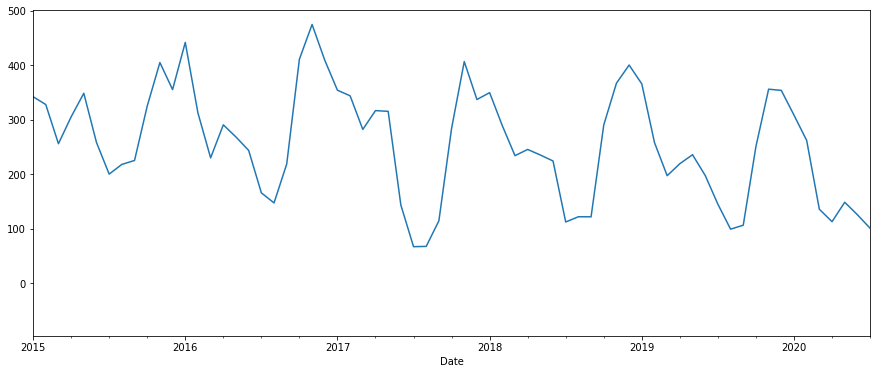

In [ ]:
data_month_og["AQI"].plot(figsize=(15,6))
future_df_copy["Actual"].plot()
plt.savefig(fname="sarimax.jpg", dpi=600)

In [ ]:
data_month

PM2.5       PM10         NO  ...         O3         AQI   forecast
Date                                         ...                                  
2015-02-28 -21.770288 -42.031647   2.895276  ...   4.960933  -14.361751        NaN
2015-03-31 -73.582293 -99.895127 -14.277857  ...  -2.091256  -71.864055        NaN
2015-04-30  11.224269  52.946817   3.500667  ...  29.433613   49.202151        NaN
2015-05-31   5.547022  83.059312  12.323204  ...  10.889613   43.313978        NaN
2015-06-30 -11.332355 -85.940978 -10.862538  ...  -1.978946  -90.247312        NaN
...               ...        ...        ...  ...        ...         ...        ...
2020-03-31 -63.977686 -97.686485 -17.106874  ...   0.402113 -126.299221 -66.523166
2020-04-30 -12.566452 -17.311366 -12.239677  ...   8.326312  -22.838710  22.613989
2020-05-31  10.508710  32.784591   0.060323  ...  10.582398   35.645161 -11.259846
2020-06-30  -8.754043 -16.452925  -1.311656  ... -17.152065  -22.911828 -73.367726
2020-07-31   7.315333   7.450667  -2.128667  ...  -9.886000  -24.733333 -97.903879

[66 rows x 11 columns]

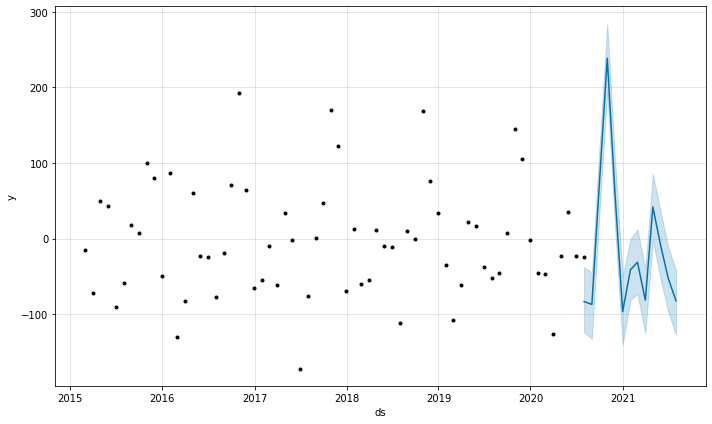

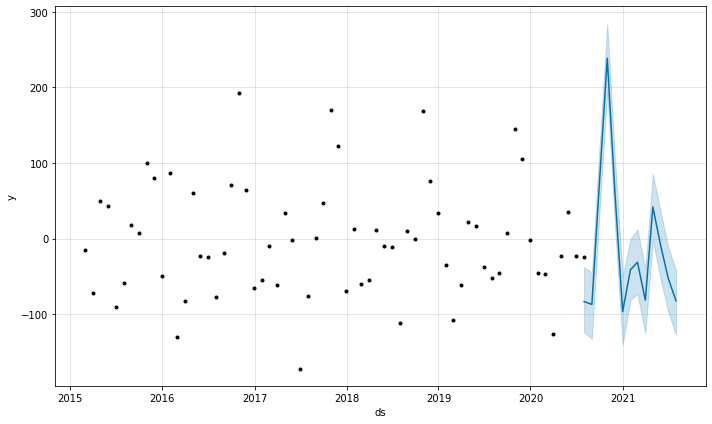

In [ ]:
model.plot(forecast)

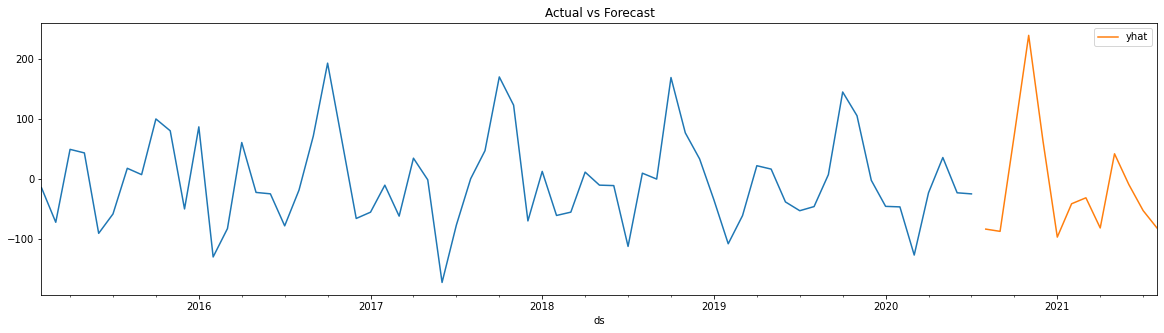

In [ ]:
# plotting the actual and forecast values

ax = (data_month["AQI"].plot(figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
# future_df.set_index("ds", inplace=True)

In [ ]:
future_df=pd.concat([data_month,future_df])
future_df['forecast'] = model.predict(start = 66, end = 79, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

TypeError: ignored

In [ ]:
future_df

PM2.5       PM10  ...  forecast         ds
2015-02-28 00:00:00 -21.770288 -42.031647  ...       NaN        NaT
2015-03-31 00:00:00 -73.582293 -99.895127  ...       NaN        NaT
2015-04-30 00:00:00  11.224269  52.946817  ...       NaN        NaT
2015-05-31 00:00:00   5.547022  83.059312  ...       NaN        NaT
2015-06-30 00:00:00 -11.332355 -85.940978  ...       NaN        NaT
...                        ...        ...  ...       ...        ...
8                          NaN        NaN  ...       NaN 2021-04-01
9                          NaN        NaN  ...       NaN 2021-05-01
10                         NaN        NaN  ...       NaN 2021-06-01
11                         NaN        NaN  ...       NaN 2021-07-01
12                         NaN        NaN  ...       NaN 2021-08-01

[79 rows x 12 columns]

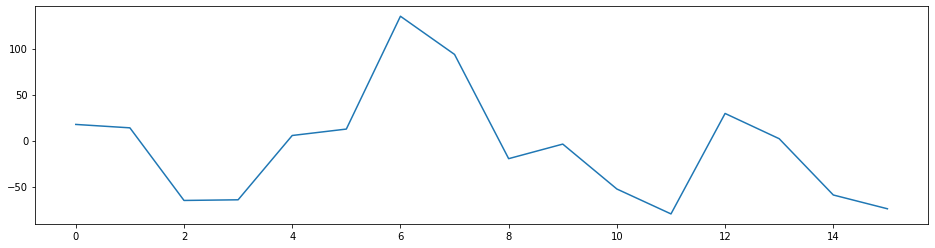

In [ ]:
predictions["yhat"].plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_month_prophet.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month_prophet.columns)

future_datest_df.tail()

future_df=pd.concat([data_month_prophet,future_datest_df])

future_df['forecast'] = predictions["yhat"]
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

TypeError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data_month['AQI'][(data_month['forecast'].dropna().index)].values, predictions['yhat'].values)
mae

25.407302193559374

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



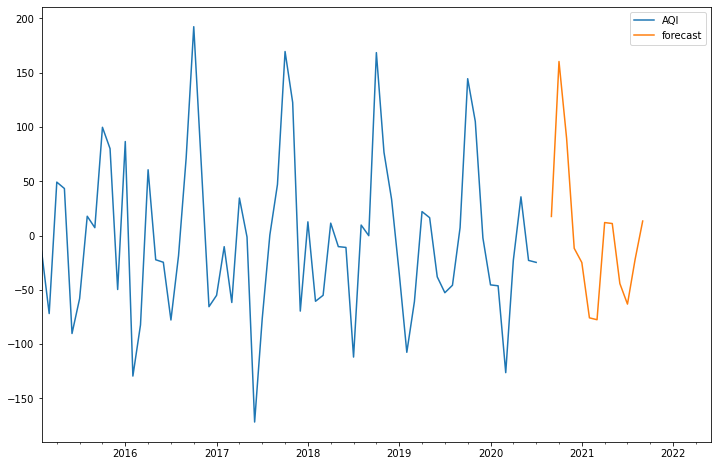

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_month.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

future_datest_df.tail()

future_df=pd.concat([data_month,future_datest_df])

future_df['forecast'] = results.predict(start = 67, end = 79, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df["2020-08-01":"2021-08-01"]["forecast"]

2020-08-31           NaN
2020-09-30     17.574157
2020-10-31    160.295725
2020-11-30     89.497130
2020-12-31    -11.770128
2021-01-31    -24.856479
2021-02-28    -75.811004
2021-03-31    -77.549700
2021-04-30     11.947053
2021-05-31     11.052899
2021-06-30    -44.256373
2021-07-31    -63.152796
Name: forecast, dtype: float64

In [ ]:
data_month["2019-08-01":"2020-08-01"]["AQI"]

Date
2019-08-31    -45.806452
2019-09-30      7.243011
2019-10-31    144.466667
2019-11-30    105.100000
2019-12-31     -2.196774
2020-01-31    -45.451613
2020-02-29    -46.313682
2020-03-31   -126.299221
2020-04-30    -22.838710
2020-05-31     35.645161
2020-06-30    -22.911828
2020-07-31    -24.733333
Freq: M, Name: AQI, dtype: float64

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_delhi['AQI'])

ADF Test Statistic : -3.432900787202573
p-value : 0.00988713035480299
#Lags Used : 17
Number of Observations : 1991
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_delhi['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                 2008
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10722.678
Method:                       css-mle   S.D. of innovations             50.447
Date:                Sat, 18 Sep 2021   AIC                          21453.357
Time:                        10:11:36   BIC                          21475.776
Sample:                    01-02-2015   HQIC                         21461.587
                         - 07-01-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1277      0.323     -0.396      0.692      -0.760       0.505
ar.L1.D.AQI     0.6852      0.024     28.818      0.000       0.639       0.732
ma.L1.D.AQI    -0.9101      0.012    -73.942      0.000      -0.934      -0.886
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4594           +0.0000j            1.4594            0.0000
MA.1            1.0988           +0.0000j            1.0988            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



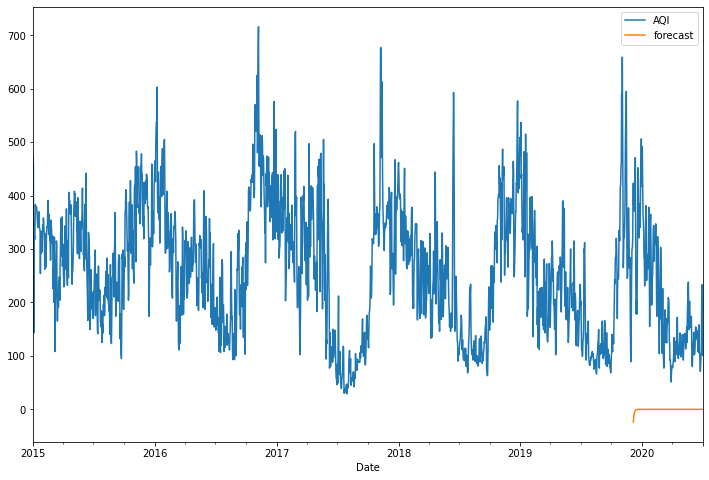

In [ ]:
data_delhi['forecast']=model_fit.predict(start=1800,end=2009,dynamic=True)
data_delhi[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(data_delhi['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,365))
# results=model.fit()
# data_delhi['forecast']=results.predict(start=1800,end=2009,dynamic=True)
# data_delhi[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[data_delhi.index[-1]+ DateOffset(days=x)for x in range(0,200)]
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

# future_datest_df.tail()

# future_df=pd.concat([data_delhi,future_datest_df])

# future_df['forecast'] = results.predict(start = 2010, end = 2210, dynamic= True)
# future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:

!pip install kats

     |████████████████████████████████| 6.3 MB 3.7 MB/s 
     |████████████████████████████████| 866 kB 53.9 MB/s 
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 503 kB 22.8 MB/s 
     |████████████████████████████████| 3.4 MB 40.5 MB/s 
     |████████████████████████████████| 23.9 MB 13 kB/s 
     |████████████████████████████████| 9.5 MB 54.1 MB/s 
     |████████████████████████████████| 26.3 MB 69 kB/s 
     |████████████████████████████████| 486 kB 55.6 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286607 sha256=a4bdd4e6bd9251ed129ec1611b3aa04719977e9ef1421000db2962bdcd8c6aa0
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6638379 sha256=b1f447a82fe49d506d29a757a089f8b559fd89a6950fba7c69621f6b3ee13b16
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f8

In [ ]:
from kats.models.prophet import ProphetModel, ProphetParams

# Specify parameters
params = ProphetParams(seasonality_mode="multiplicative")

# Create a model instance
m = ProphetModel(data_week, params)

# Fit mode
m.fit()

# Forecast
fcst = m.predict(steps=30, freq="MS")
fcst

ImportError: ignored

In [ ]:
!pip install pycaret


     |████████████████████████████████| 264 kB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 34.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 167 kB 58.7 MB/s 
     |████████████████████████████████| 111 kB 57.1 MB/s 
     |████████████████████████████████| 6.8 MB 24.4 MB/s 
     |████████████████████████████████| 2.0 MB 37.5 MB/s 
     |████████████████████████████████| 1.3 MB 58.1 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 248 kB 40.5 MB/s 
     |████████████████████████████████| 14.6 MB 123 kB/s 
     |████████████████████████████████| 271 kB 62.3 MB/s 
     |████████████████████████████████| 10.1 MB 73.0 MB/s 
     |████████████████████████████████| 675 kB 25.5 MB/s 
     |█████████████████

In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

ImportError: ignored

In [ ]:
data=pd.read_csv("city_day.csv")

data_pred=data.loc[data['City']=='Delhi']

In [ ]:
data_pred.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)
data_pred["Date"] = pd.to_datetime(data_pred["Date"], format="%Y-%m-%d", errors="coerce")
assert data_pred["Date"].dtype == "datetime64[ns]"

In [ ]:
data_pred=data_pred.reset_index()
data_pred

In [ ]:
# data_pred["Date"]=data_pred["Date"].resample("M").mean()

In [ ]:
# extract month and year from dates
data_pred['Month'] = [i.month for i in data_pred['Date']]
data_pred['Year'] = [i.year for i in data_pred['Date']]
# create a sequence of numbers
data_pred['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data_pred.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Passengers']] 
# check the head of the dataset
data.head()